In [1]:
import pandas as pd
import ast
import json

df = pd.read_csv("../data/processed/movie_stats/movie_stats.csv", index_col=0)
df = df.reset_index()

df["cast"] = df["cast"].map(ast.literal_eval)
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day



print(df)

    index                                   movie_name     imdb_id  \
0       0                                  The Marvels  tt10676048   
1       1               Guardians of the Galaxy Vol. 3   tt6791350   
2       2                      Spider-Man: No Way Home  tt10872600   
3       3                       Avengers: Infinity War   tt4154756   
4       4            Ant-Man and the Wasp: Quantumania  tt10954600   
5       5               Black Panther: Wakanda Forever   tt9114286   
6       6                       Thor: Love and Thunder  tt10648342   
7       7                                 The Avengers   tt0848228   
8       8                               Captain Marvel   tt4154664   
9       9  Doctor Strange in the Multiverse of Madness   tt9419884   
10     10                            Avengers: Endgame   tt4154796   
11     11                      Avengers: Age of Ultron   tt2395427   
12     12    Shang-Chi and the Legend of the Ten Rings   tt9376612   
13     13           

In [2]:
df.describe()

index                   release_date  movie_budget  movie_revenue  \
count  33.000000                             33  3.300000e+01   3.300000e+01   
mean   16.181818  2017-05-08 19:38:10.909090816  2.022061e+08   8.983435e+08   
min     0.000000            2008-04-30 00:00:00  1.300000e+08   1.089981e+08   
25%     8.000000            2014-03-20 00:00:00  1.600000e+08   5.193120e+08   
50%    16.000000            2017-10-02 00:00:00  2.000000e+08   7.727766e+08   
75%    24.000000            2021-09-01 00:00:00  2.200000e+08   1.131928e+09   
max    34.000000            2023-11-08 00:00:00  3.650000e+08   2.800000e+09   
std     9.973260                            NaN  5.826246e+07   5.661510e+08   

       release_year  release_month  release_day  
count     33.000000      33.000000    33.000000  
mean    2016.878788       6.212121    15.787879  
min     2008.000000       2.000000     1.000000  
25%     2014.000000       4.000000     6.000000  
50%     2017.000000       6.000000    15.000000  
75%     2021.000000       7.000000    25.000000  
max     2023.000000      12.000000    30.000000  
std        4.435352       2.880512     9.717116

In [3]:
movie_counts = df["release_year"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_year

movie_budget  movie_revenue
release_year                             
2008             290000000      748886296
2010             200000000      623933331
2011             290000000      819896392
2012             220000000     1518815515
2013             370000000     1860360345
2014             340000000     1487543172
2015             495000000     1924715659
2016             430000000     1831389590
2017             555000000     2599224781
2018             640000000     4025015261
2019             668000000     5063344442
2021             750000000     3135906433
2022             700000000     2575806039
2023             724800000     1430499615

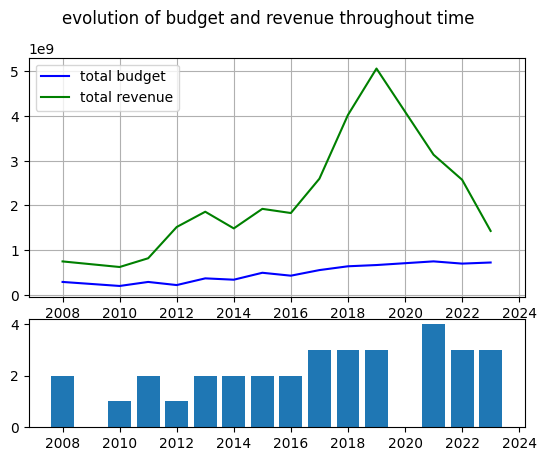

In [4]:
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1,2)
# remove the underlying axes
# for ax in axs[:2]:
#     ax.remove()
# axbig = fig.add_subplot(gs[1:, :2])


fig = plt.figure()

gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax1.grid()
ax2 = fig.add_subplot(gs[2], sharex=ax1)


ax1.plot(df_year.index, df_year["movie_budget"], color="blue", label="total budget")
# frame1.axes.get_xaxis().set_visible(False)
ax1.plot(df_year.index, df_year["movie_revenue"], color="green", label="total revenue")
ax1.legend()
ax2.bar(movie_counts.index, movie_counts)
fig.suptitle("evolution of budget and revenue throughout time")

plt.show()

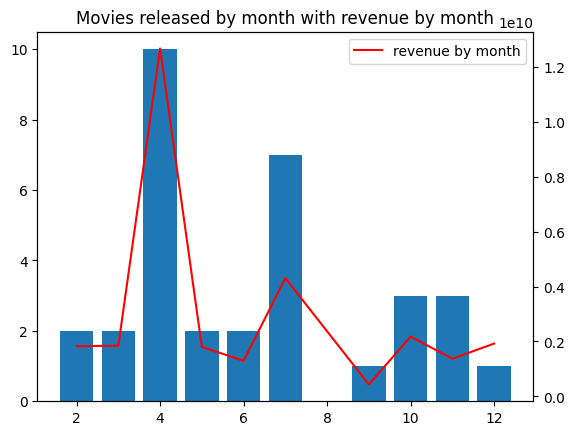

In [5]:
month_counts = df["release_month"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_month = df.groupby("release_month")[["movie_budget", "movie_revenue"]].sum()

plt.bar(month_counts.index, month_counts)
axes2 = plt.twinx()
axes2.plot(df_month["movie_revenue"], color="red", label="revenue by month")

plt.title("Movies released by month with revenue by month")
plt.legend()
plt.show()

In [6]:
user_review_df = pd.read_csv("../data/raw/reviews/RT_audience.csv")

user_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")

user_review_df

movie          user  score       date  \
0       ant-man-and-the-wasp-quantumania        Jim  R    1.0 2023-10-21   
1       ant-man-and-the-wasp-quantumania     Stephan B    3.0 2023-10-20   
2       ant-man-and-the-wasp-quantumania       Ethan A   10.0 2023-10-20   
3       ant-man-and-the-wasp-quantumania     Michael P   10.0 2023-10-18   
4       ant-man-and-the-wasp-quantumania      Robert M    1.0 2023-10-17   
...                                  ...           ...    ...        ...   
278359                 werewolf-by-night  Nyein Chan H   10.0 2022-10-07   
278360                 werewolf-by-night       Harry L   10.0 2022-10-07   
278361                 werewolf-by-night     Matthew W   10.0 2022-10-06   
278362                 werewolf-by-night           NaN   10.0 2022-10-06   
278363                 werewolf-by-night         FDB 3   10.0 2022-10-06   

                                                     text  \
0       No science was involved in this.So much potent...   
1       OMG, how terrible was that... And why oh why h...   
2       This movie deserves way more credit than its g...   
3       I loved this movie. Kang was awesome and Rudd ...   
4       Sooooo we just stopped trying????  A plot that...   
...                                                   ...   
278359                    This is the best of MCU phase 4   
278360  Werewolf By Nigth es Una Carta bien escrita y ...   
278361  Dark and Gruesome...something Marvel needed fo...   
278362                     Thanks Kevin F. thanks Michael   
278363  Werewolf by Night is definitely original enoug...   

                                                      url scrape date  
0       https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
1       https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
2       https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
3       https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
4       https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
...                                                   ...         ...  
278359  https://www.rottentomatoes.com/m/werewolf_by_n...  2023-10-20  
278360  https://www.rottentomatoes.com/m/werewolf_by_n...  2023-10-20  
278361  https://www.rottentomatoes.com/m/werewolf_by_n...  2023-10-20  
278362  https://www.rottentomatoes.com/m/werewolf_by_n...  2023-10-20  
278363  https://www.rottentomatoes.com/m/werewolf_by_n...  2023-10-20  

[278364 rows x 7 columns]

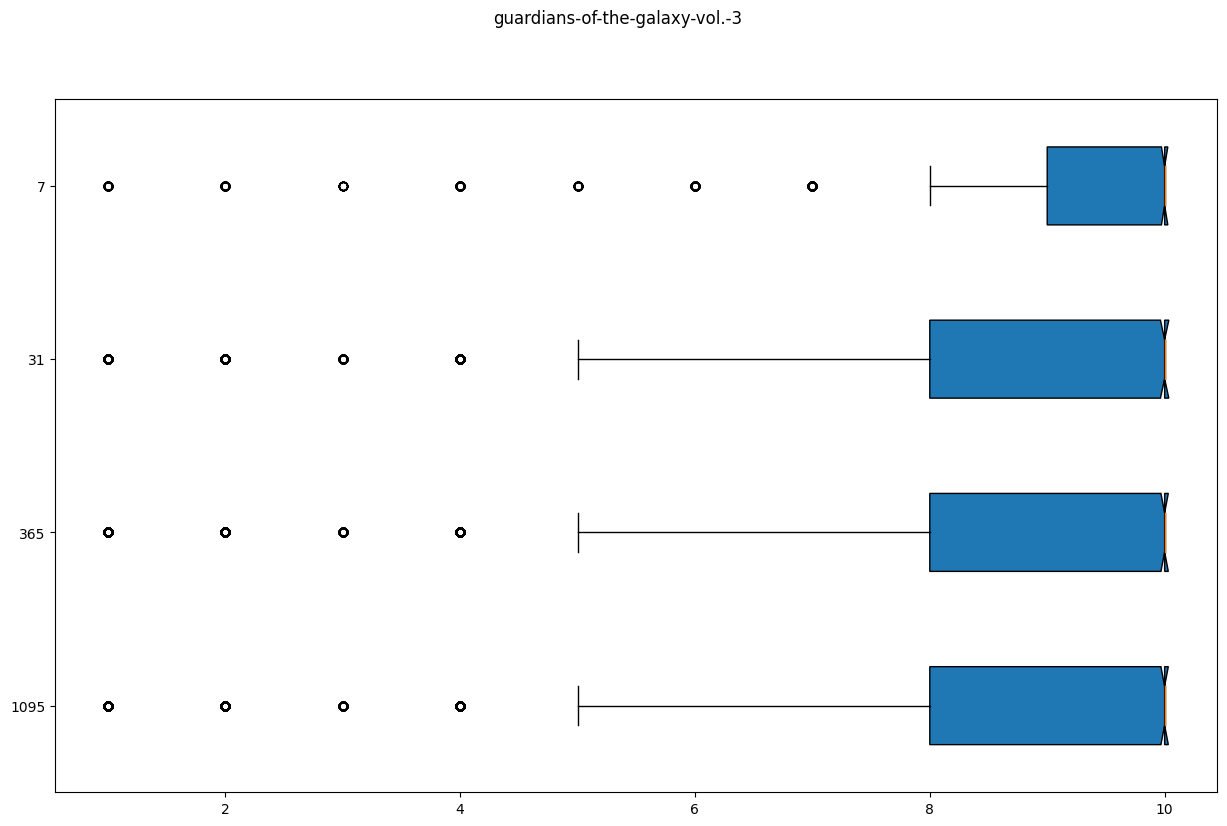

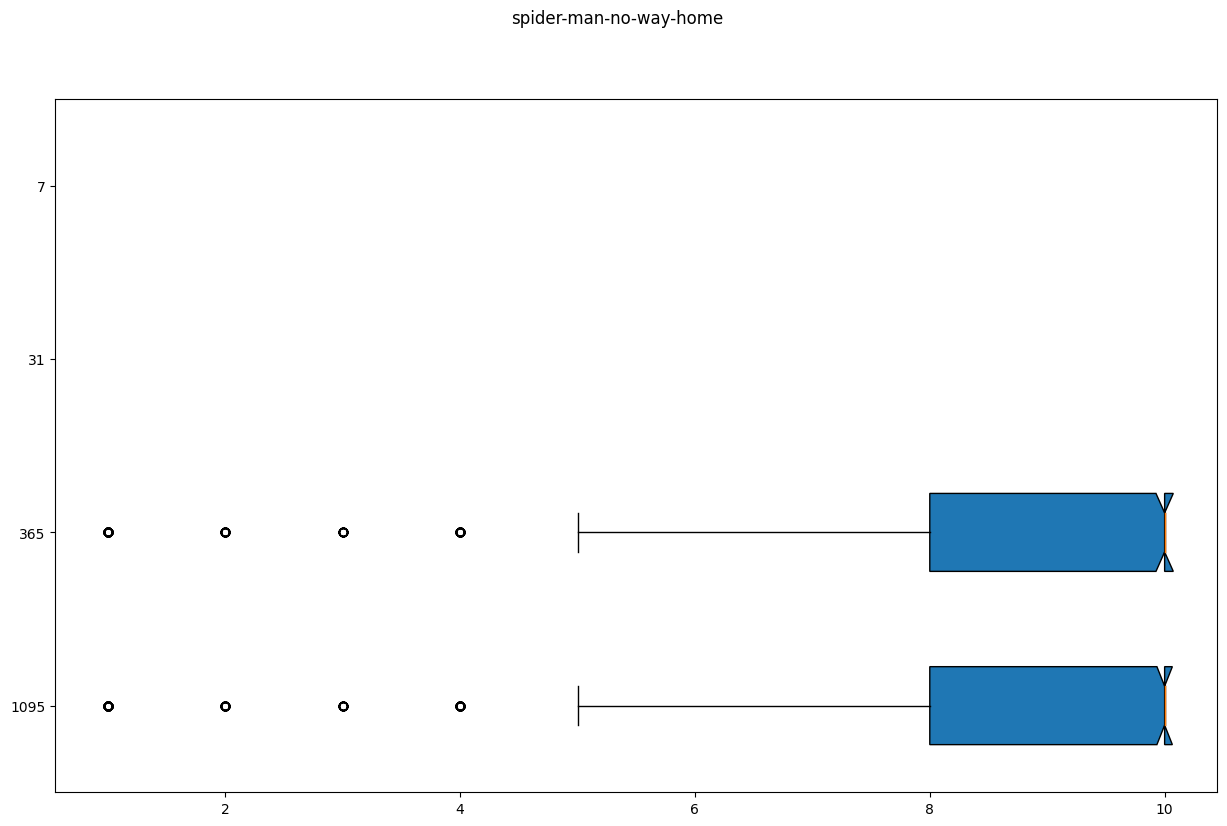

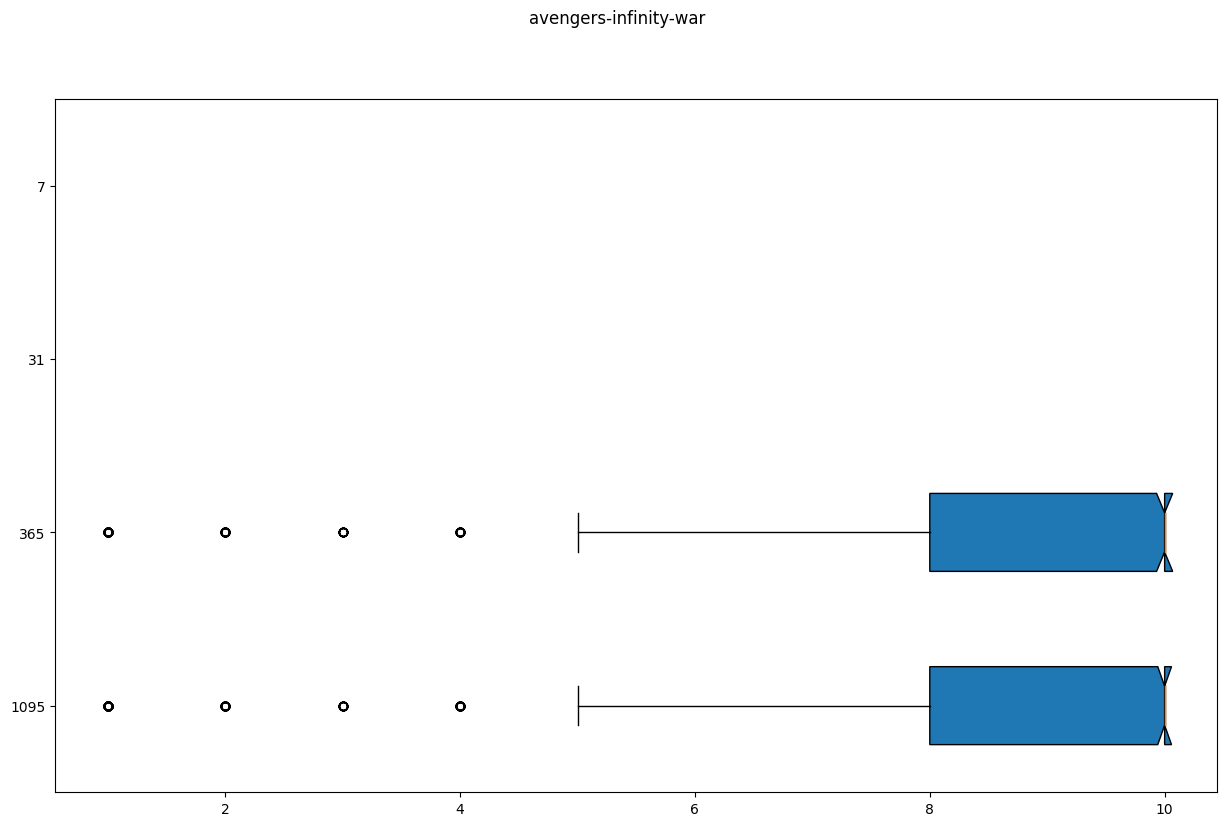

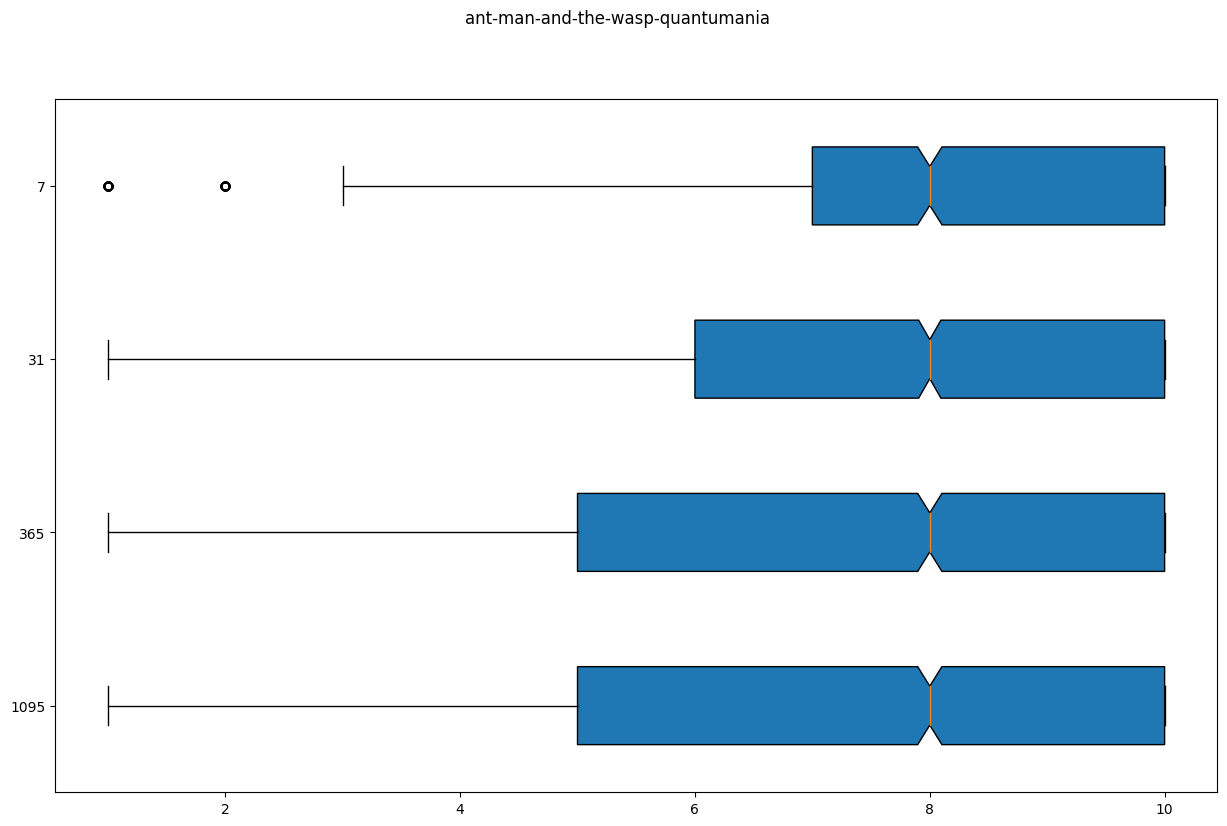

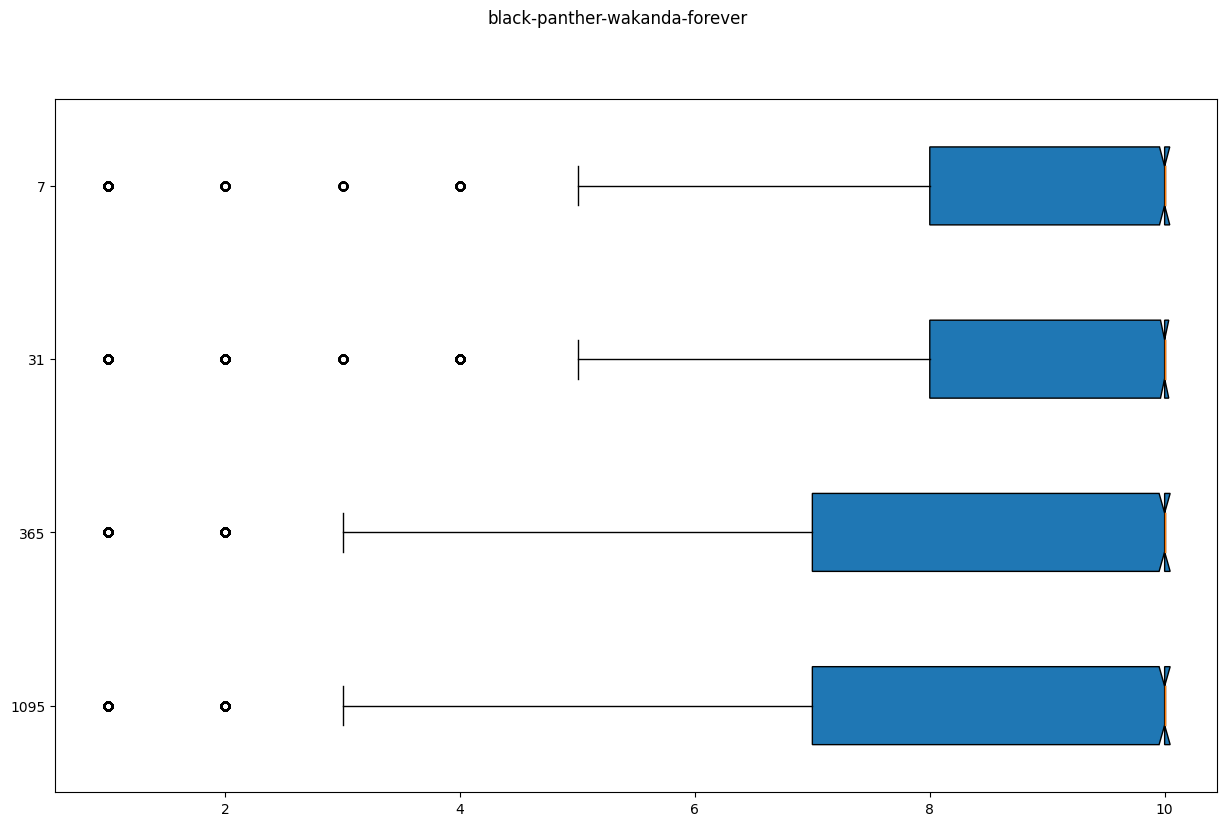

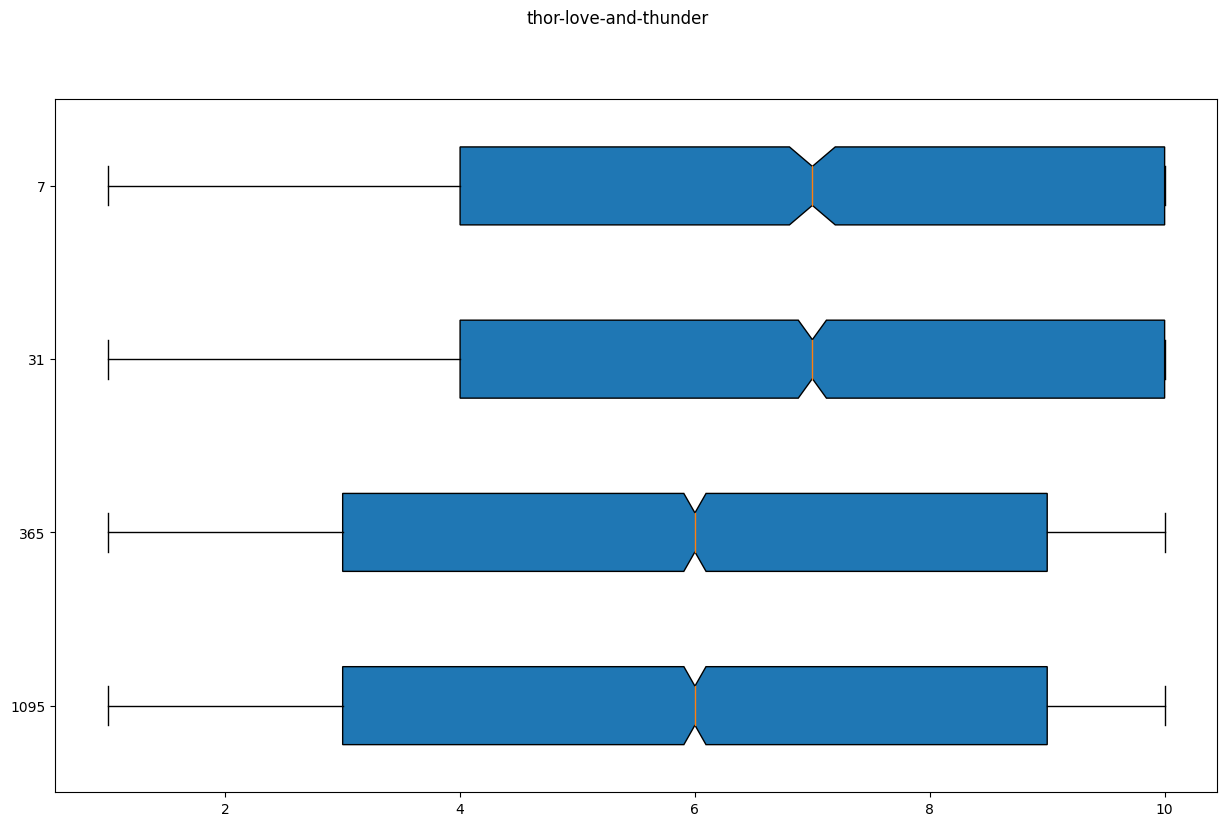

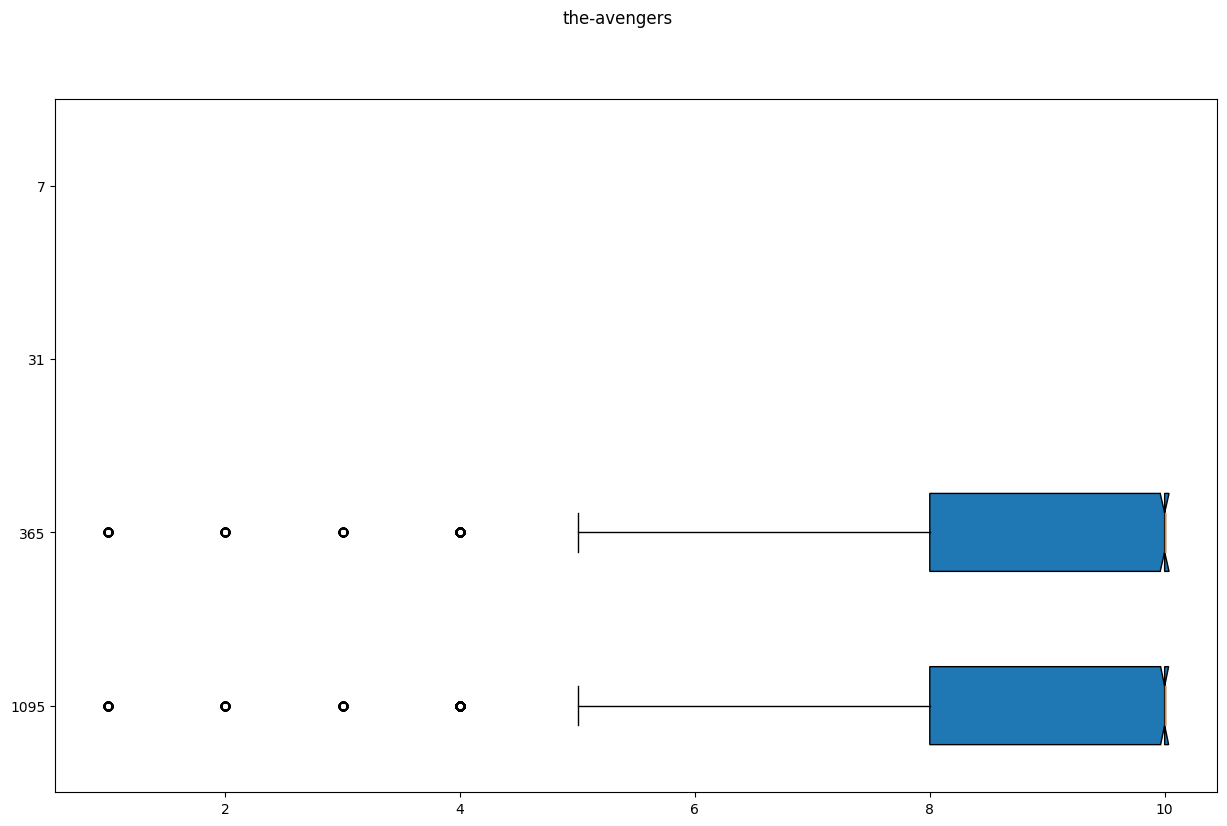

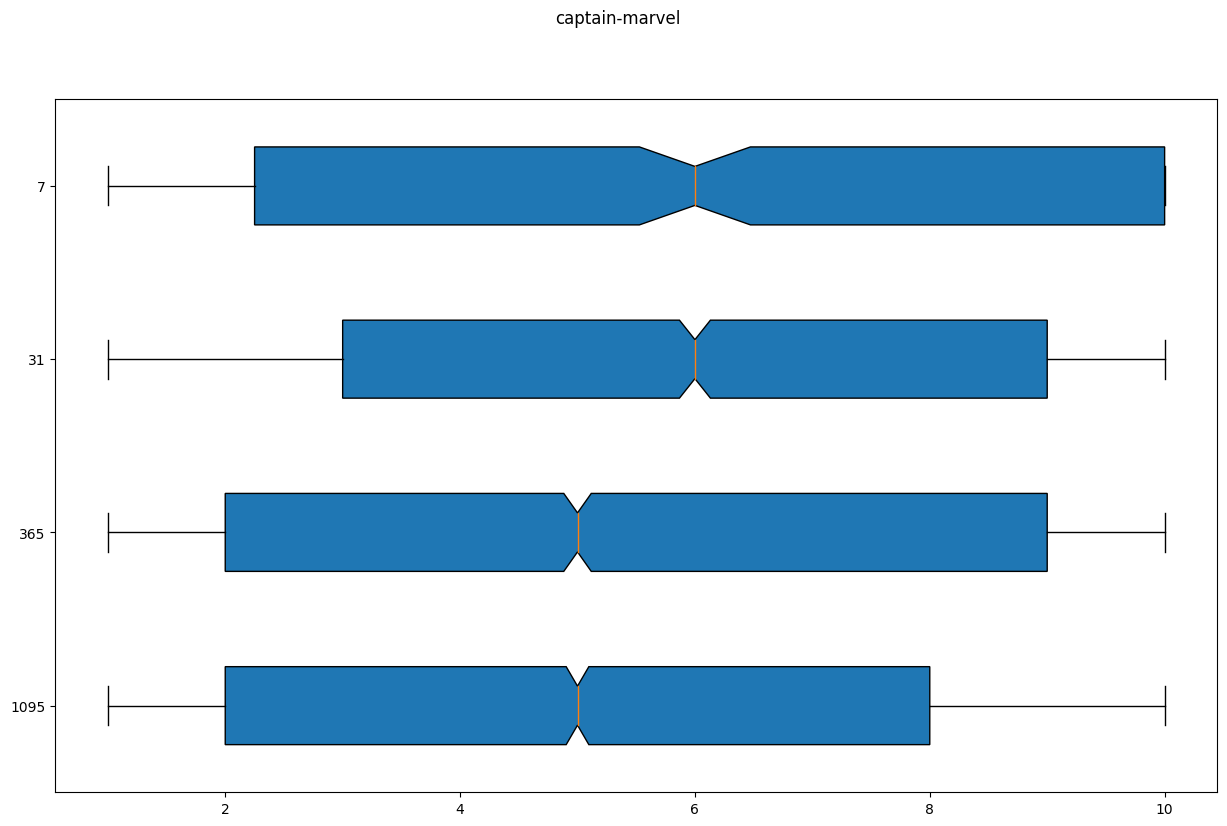

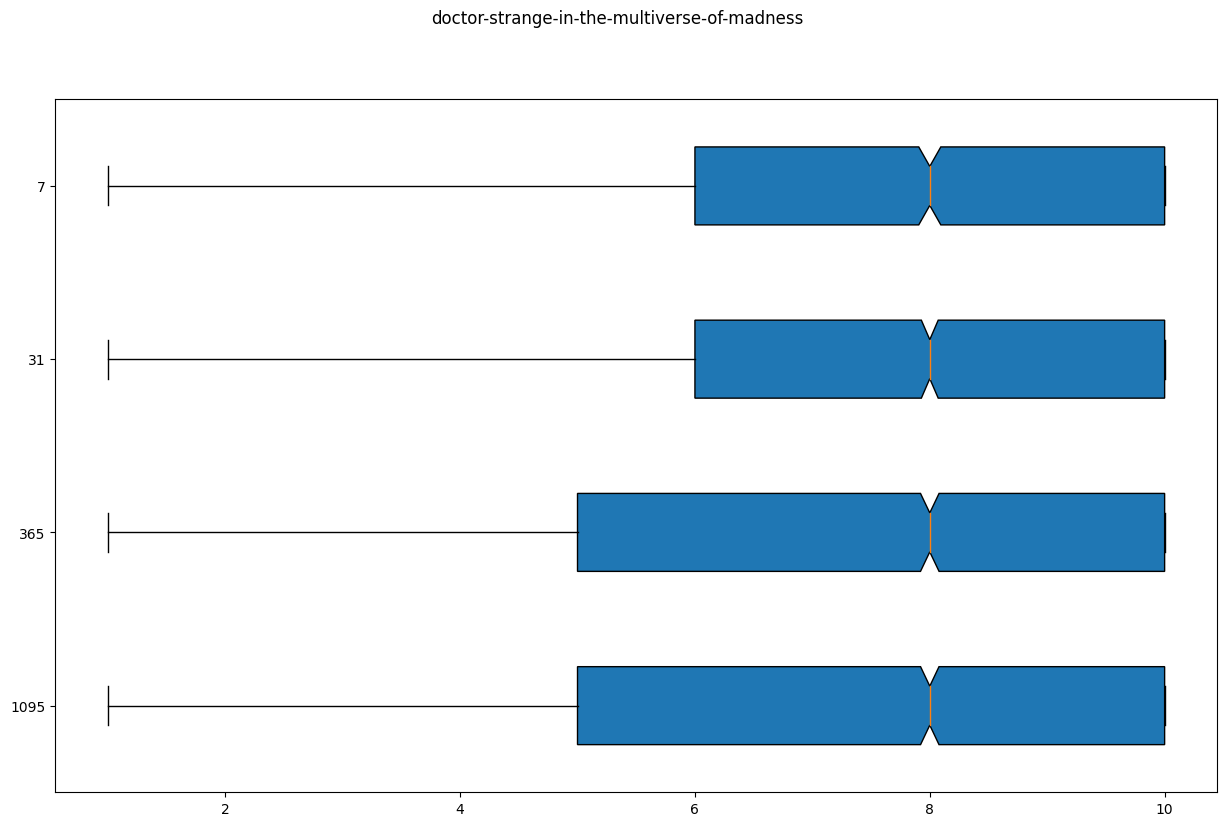

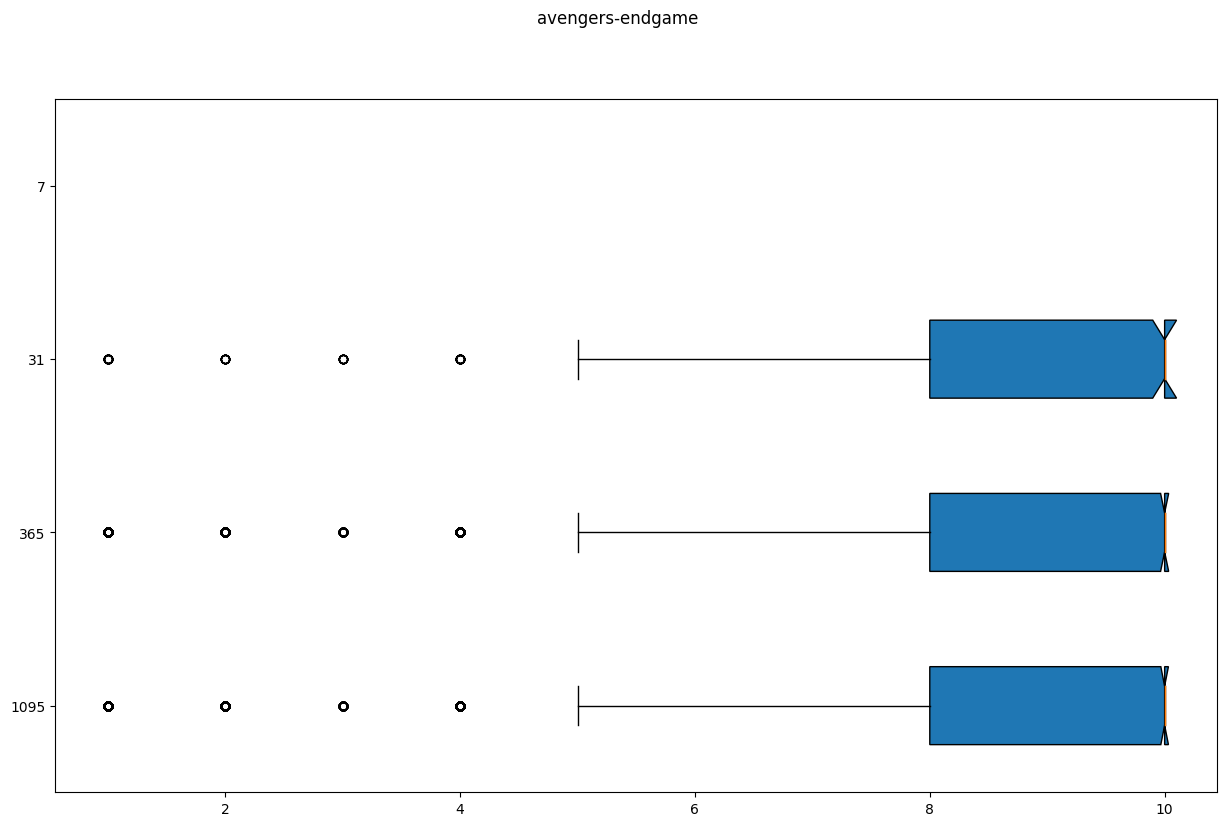

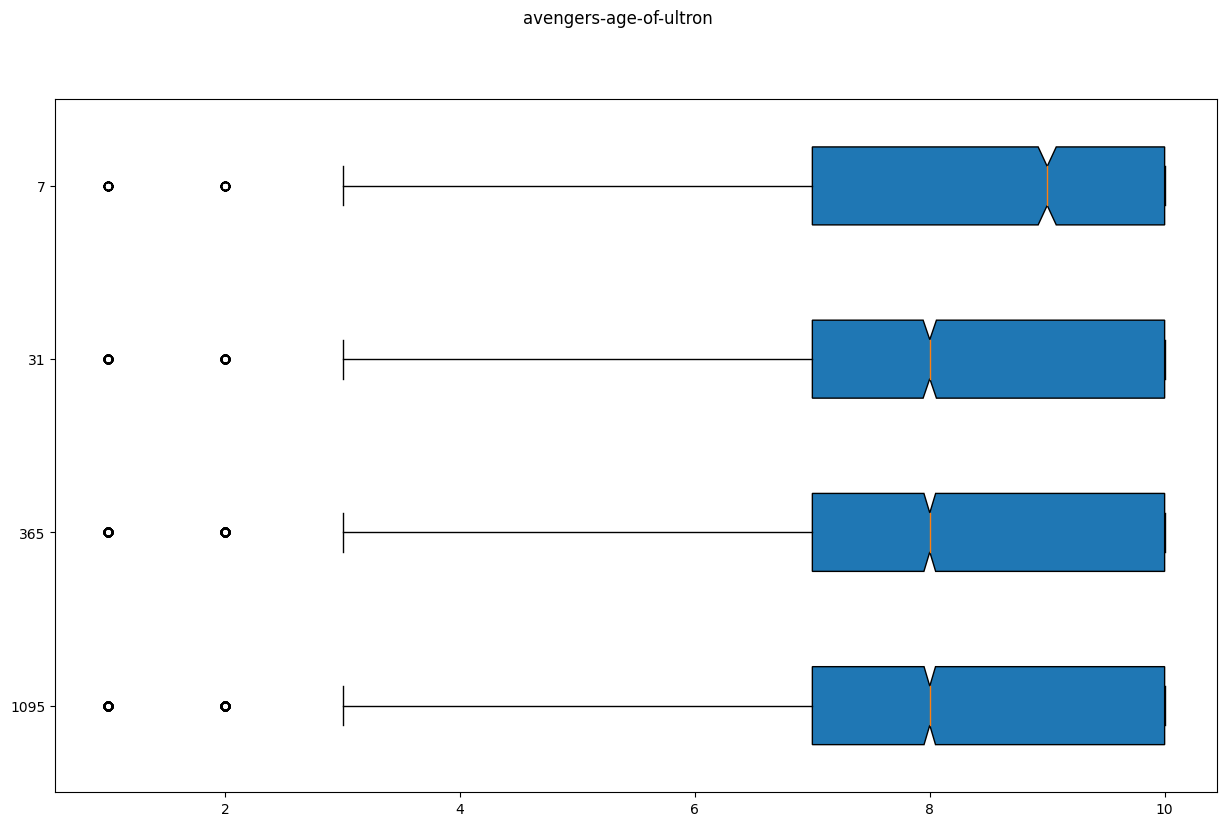

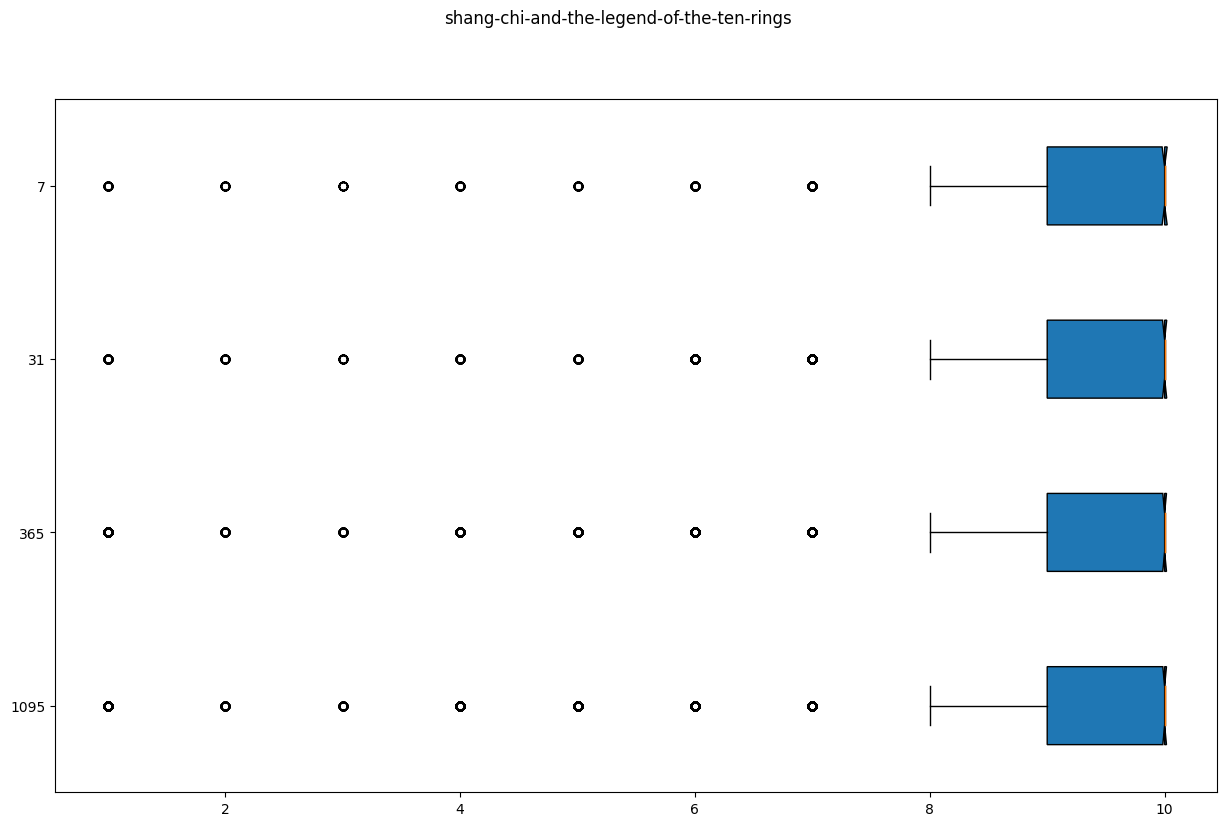

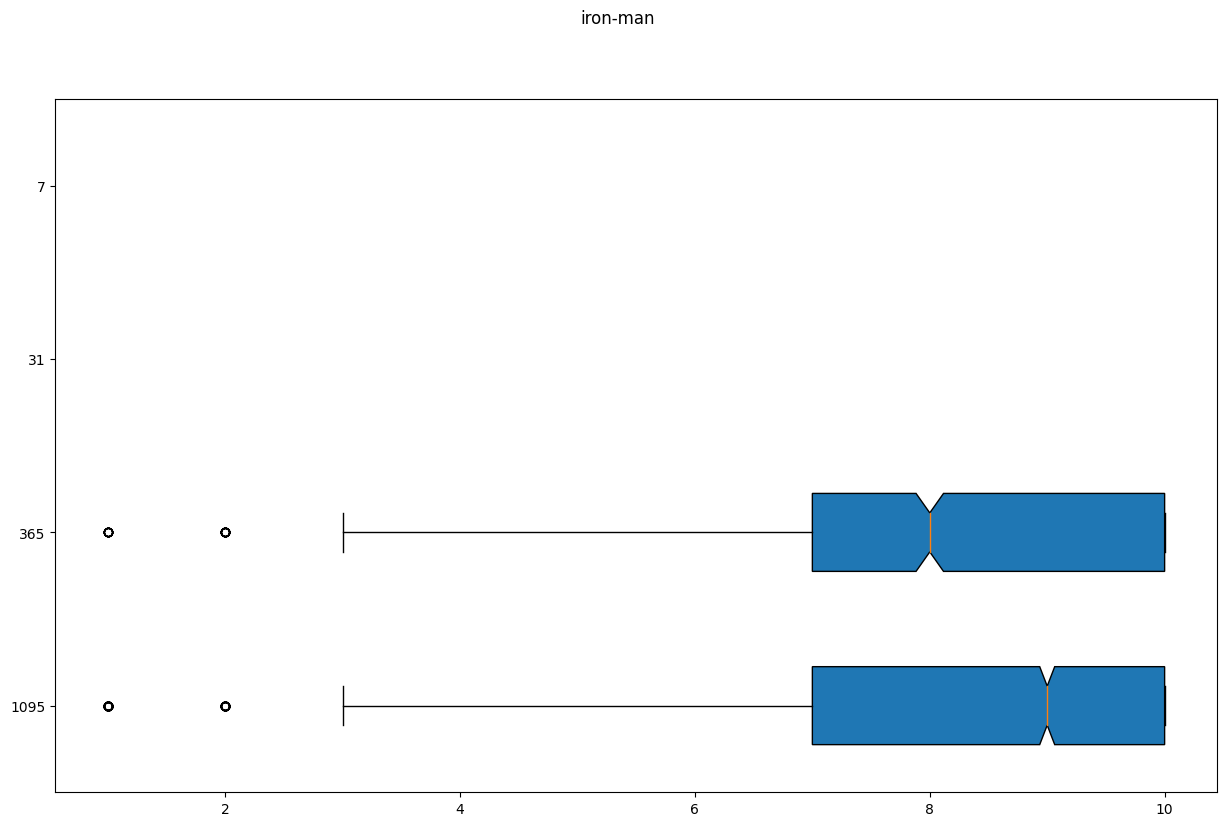

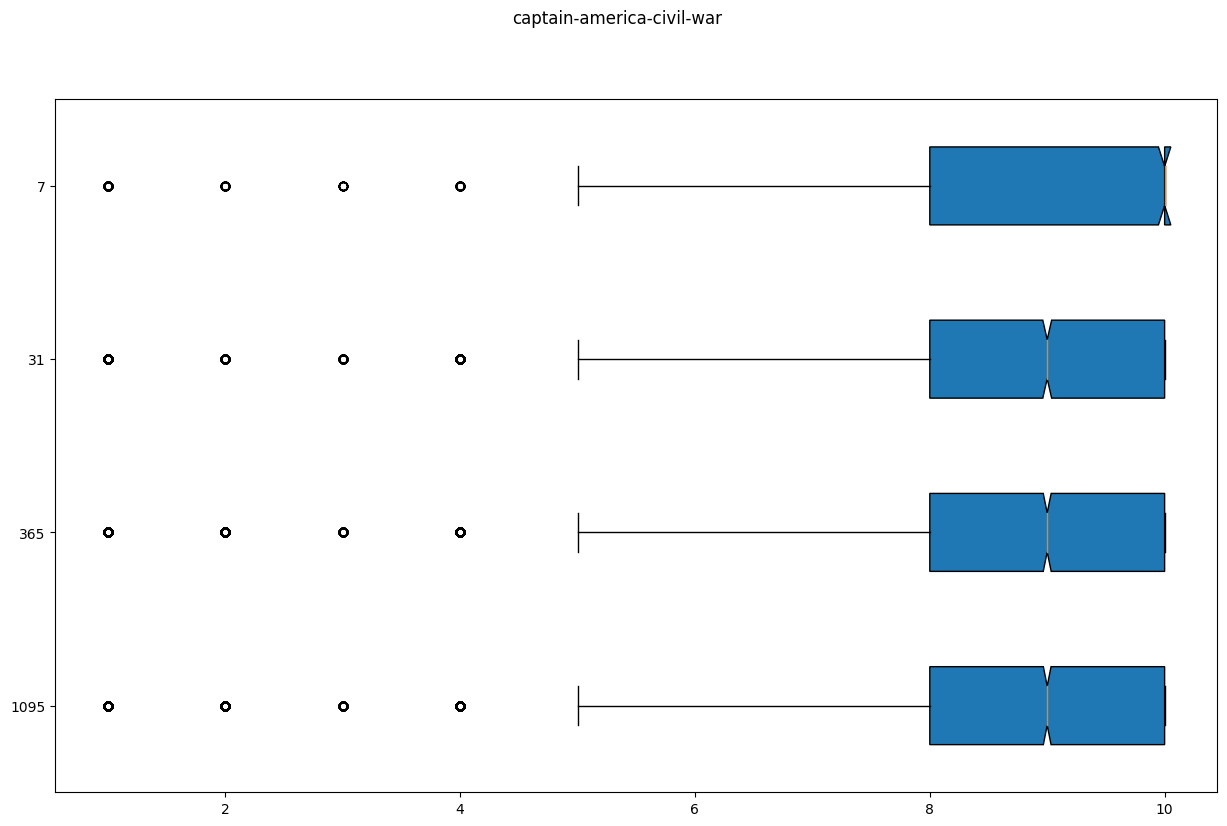

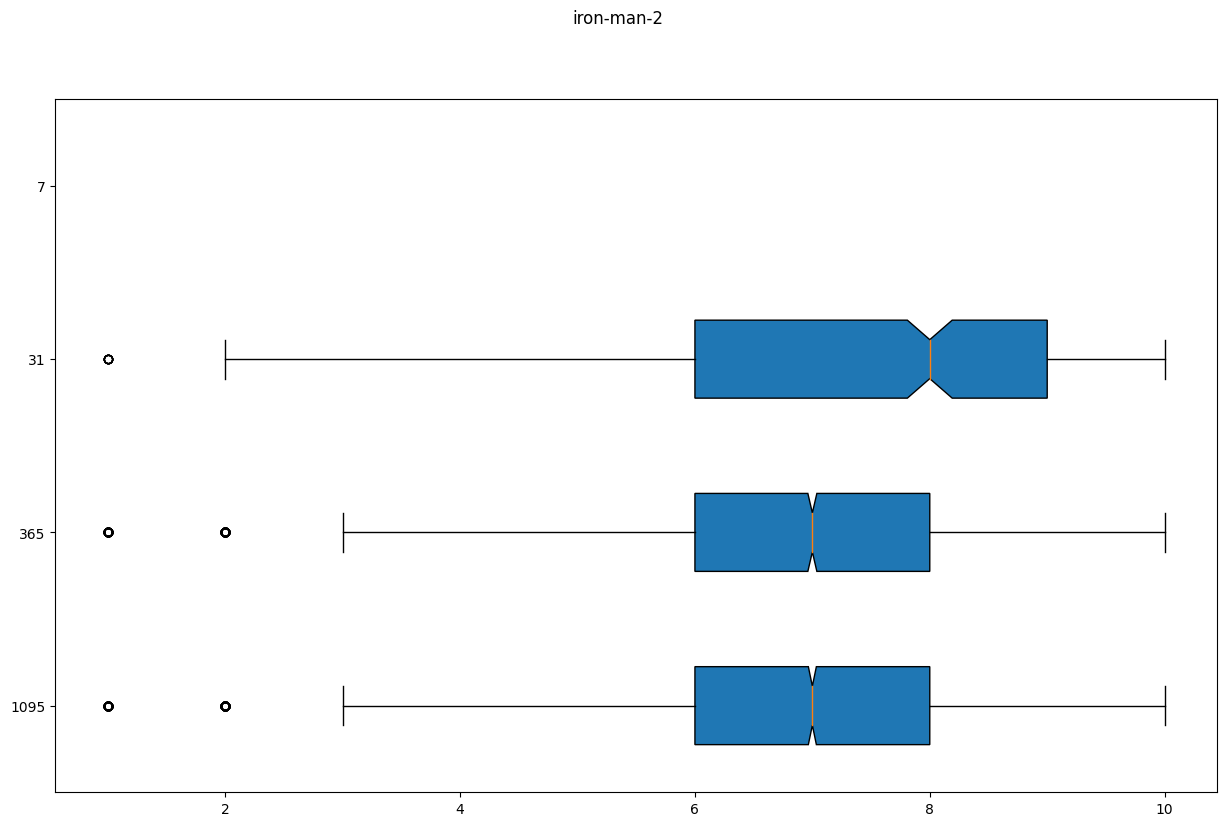

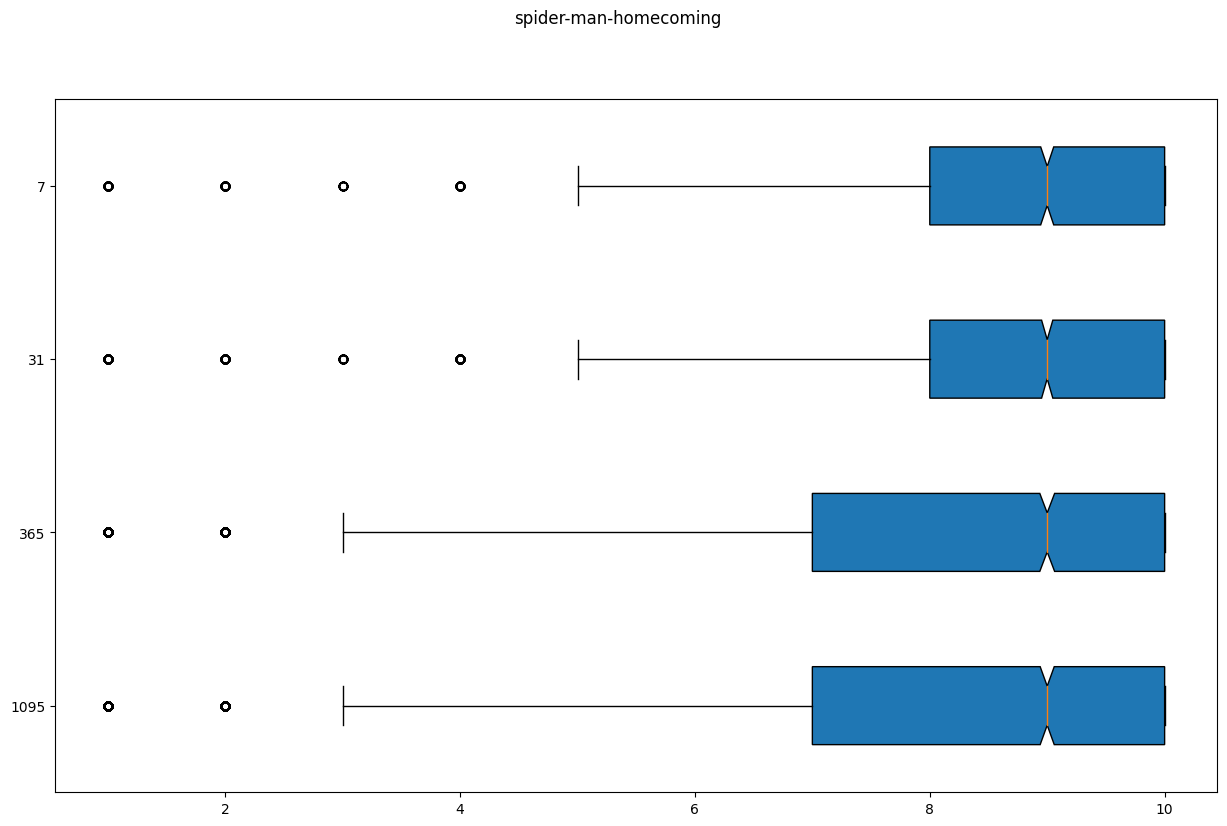

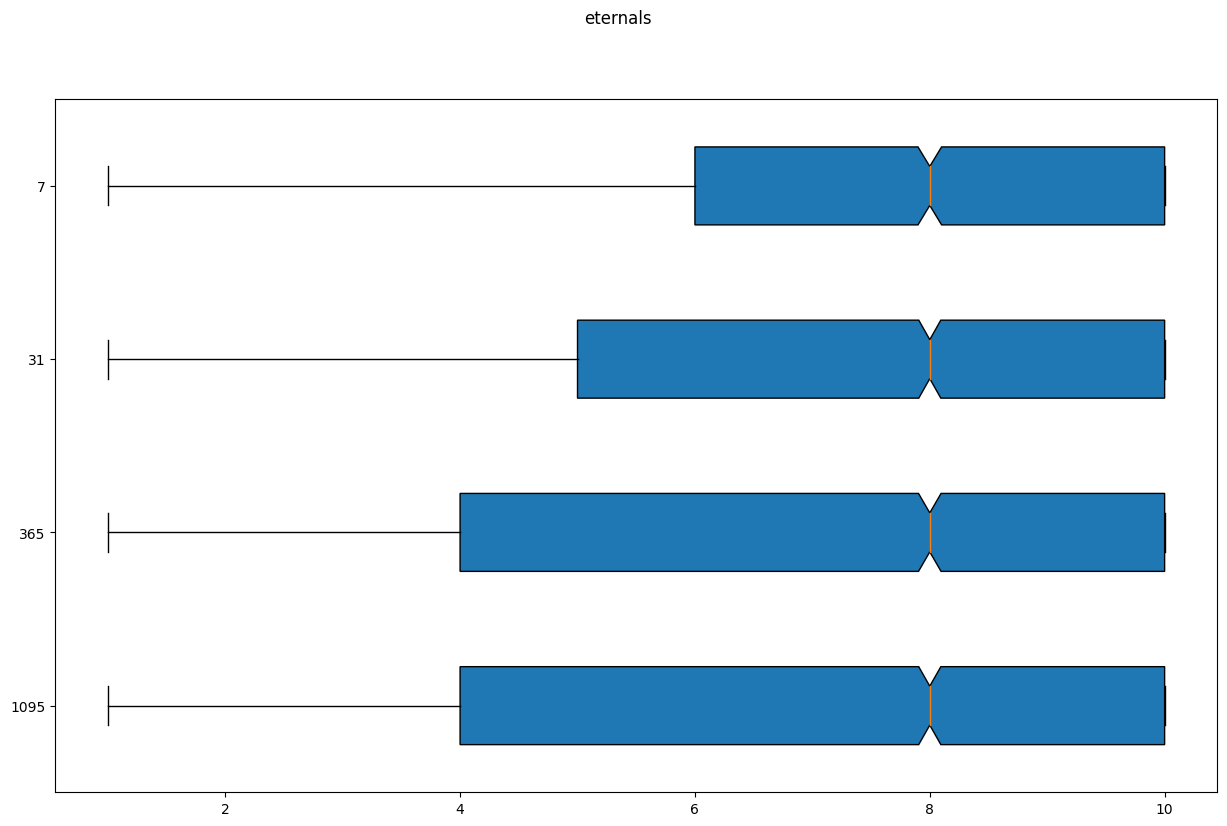

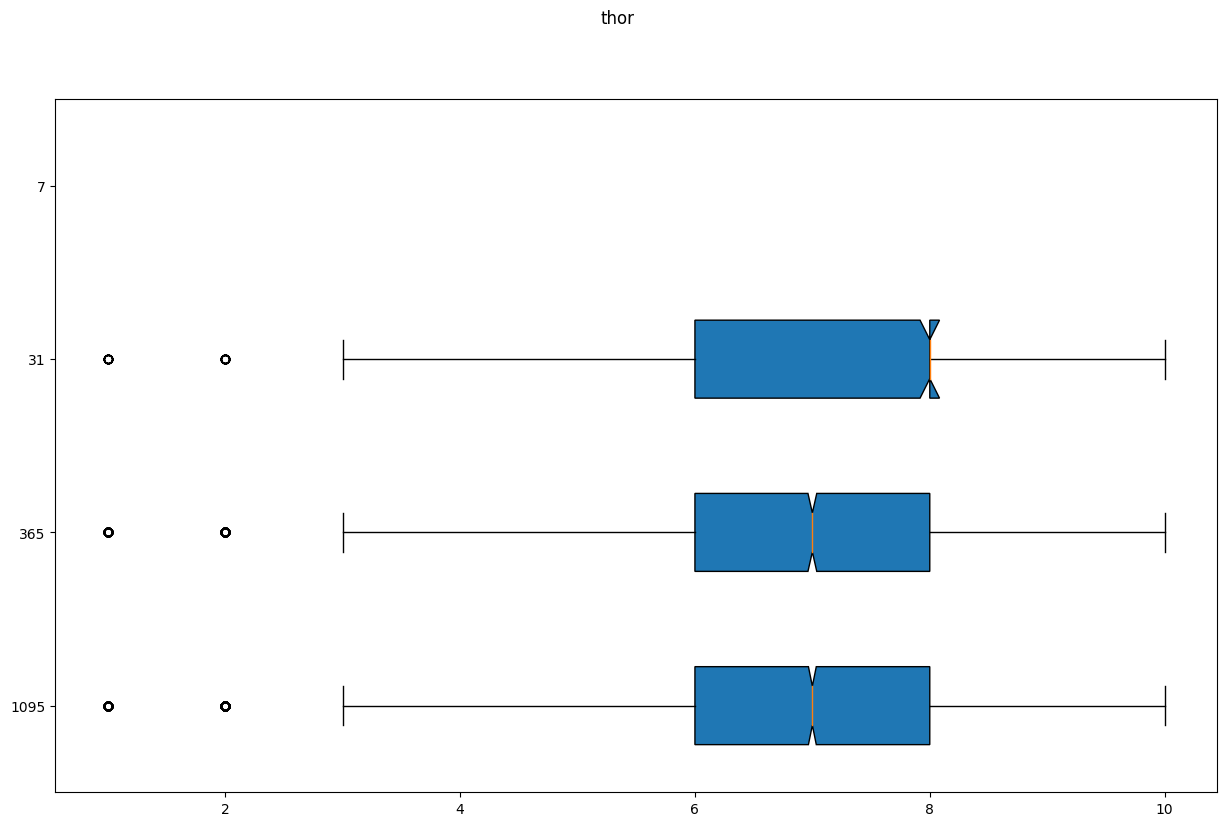

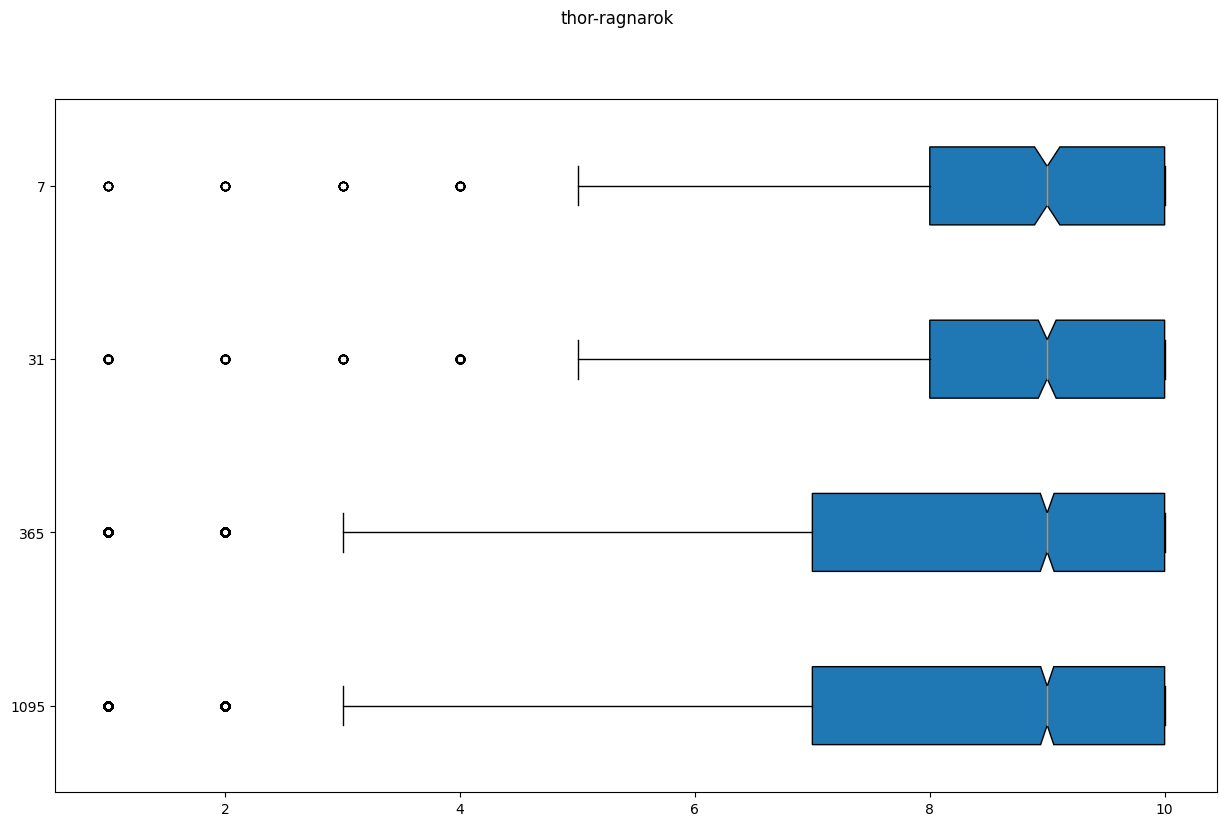

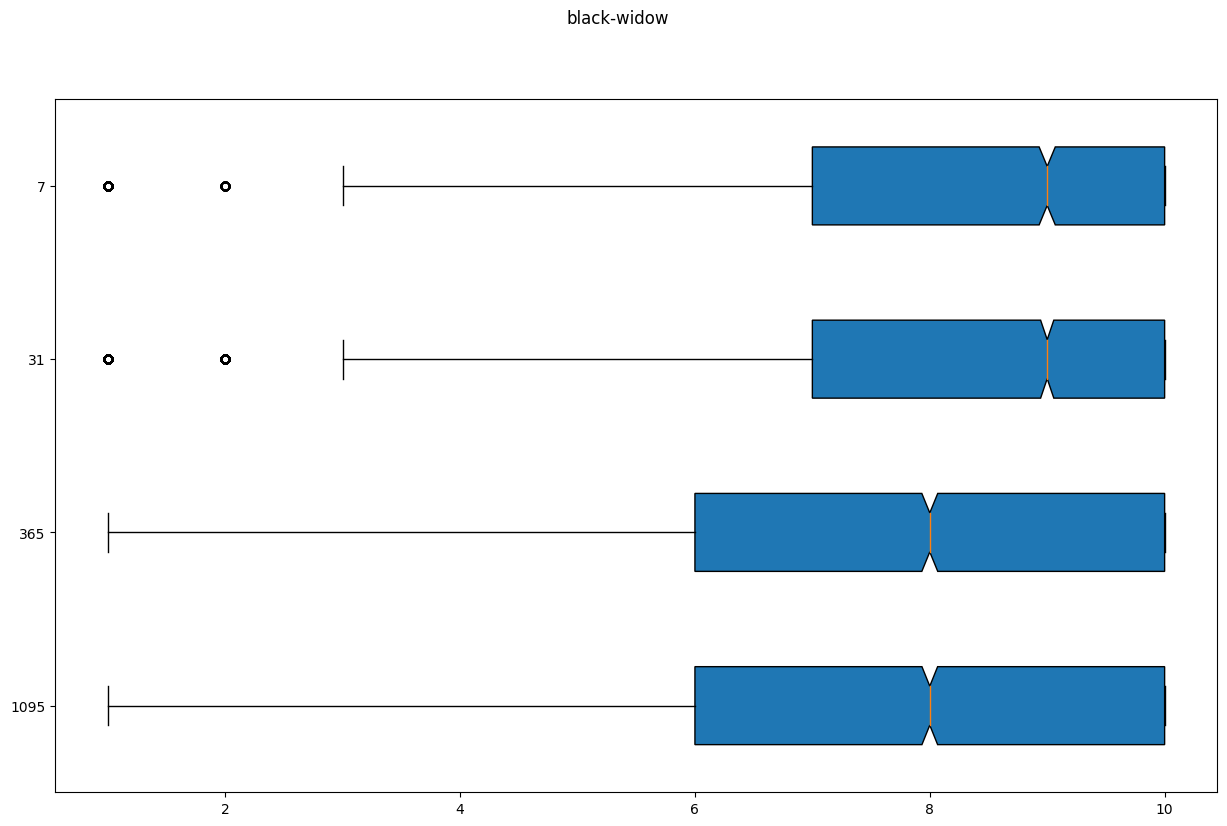

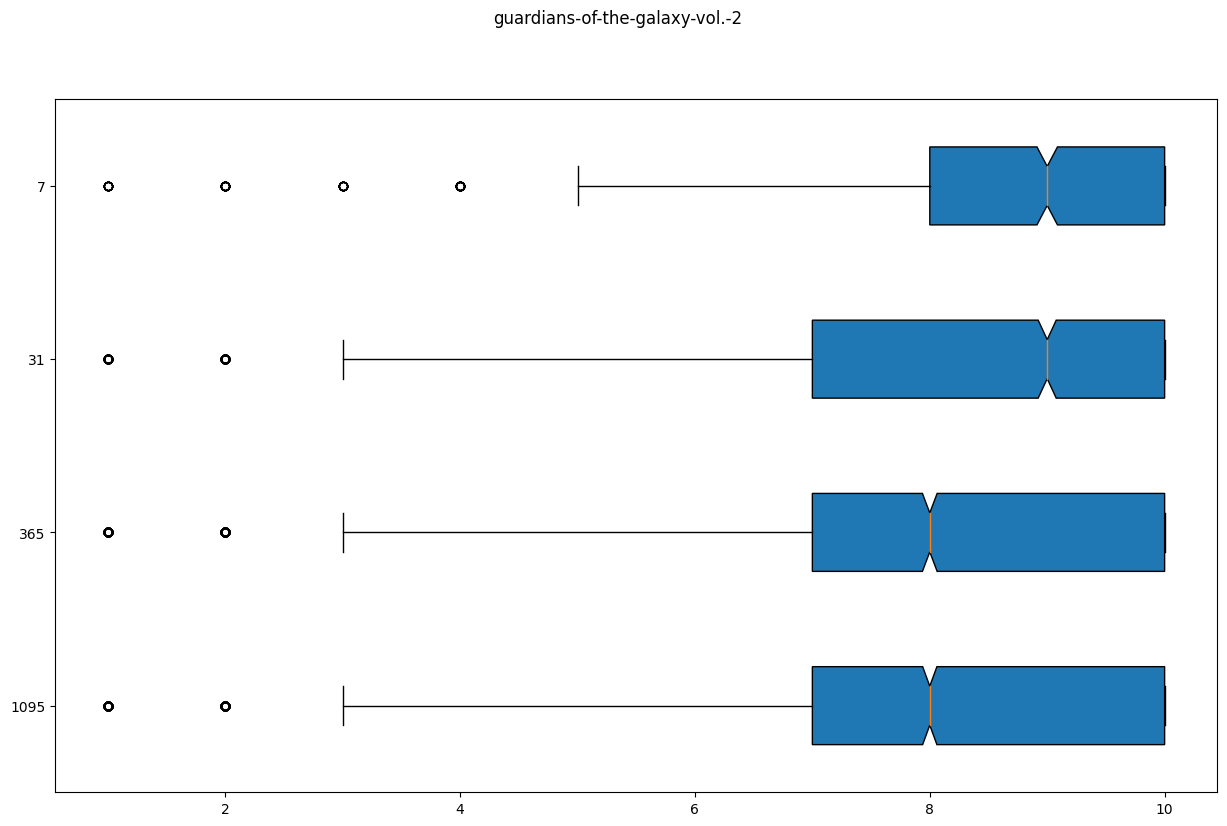

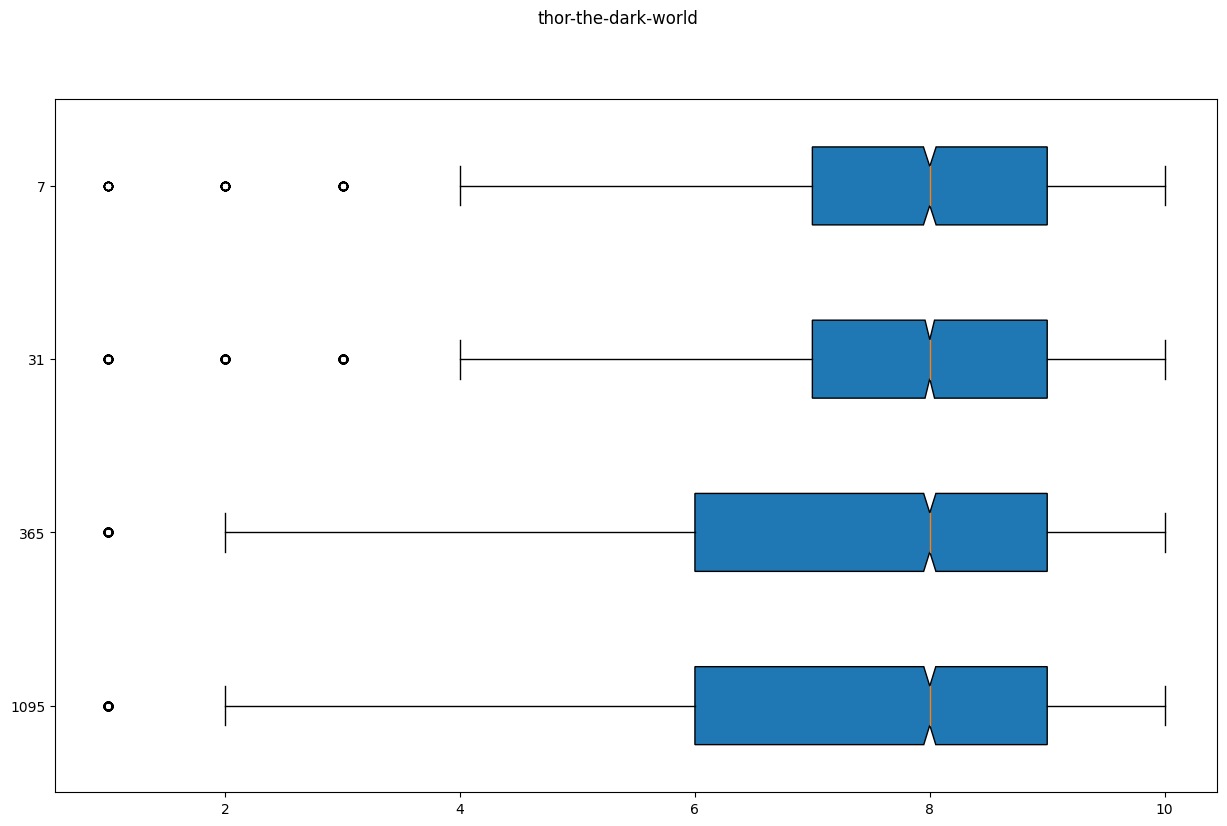

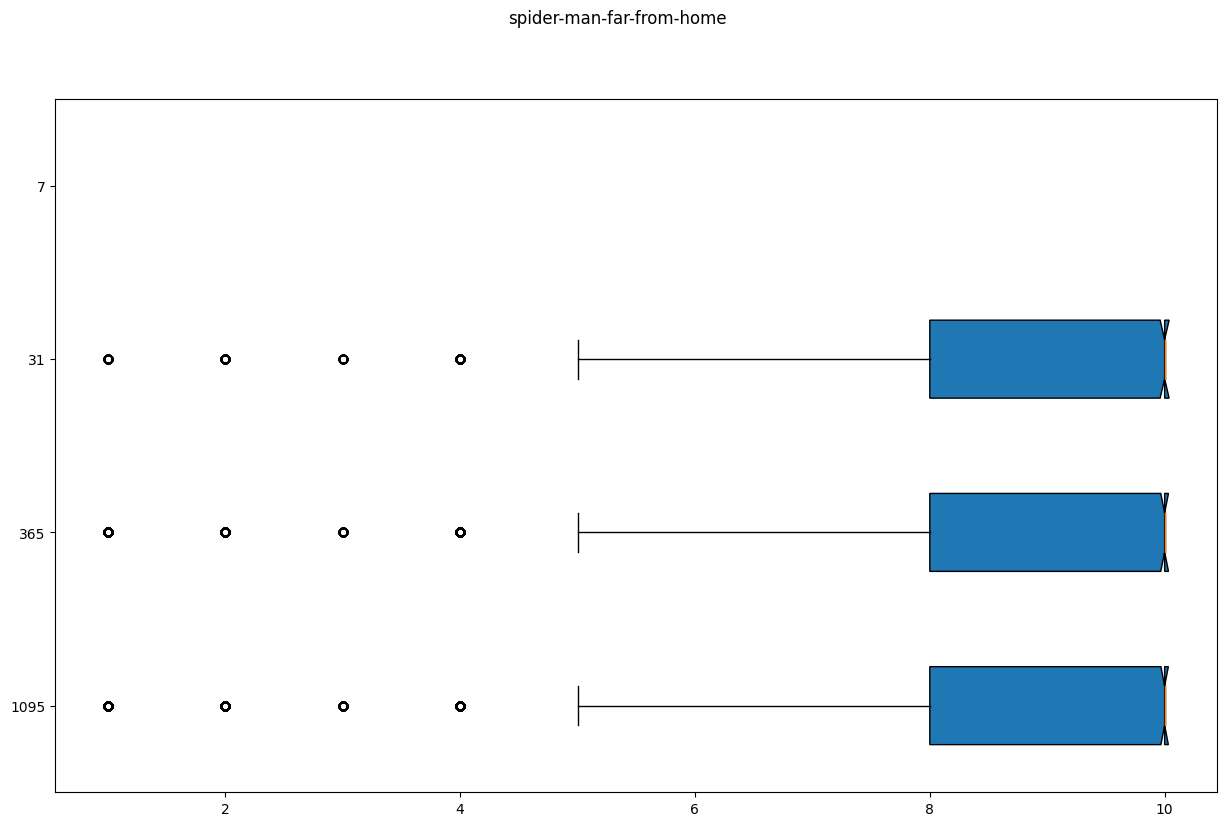

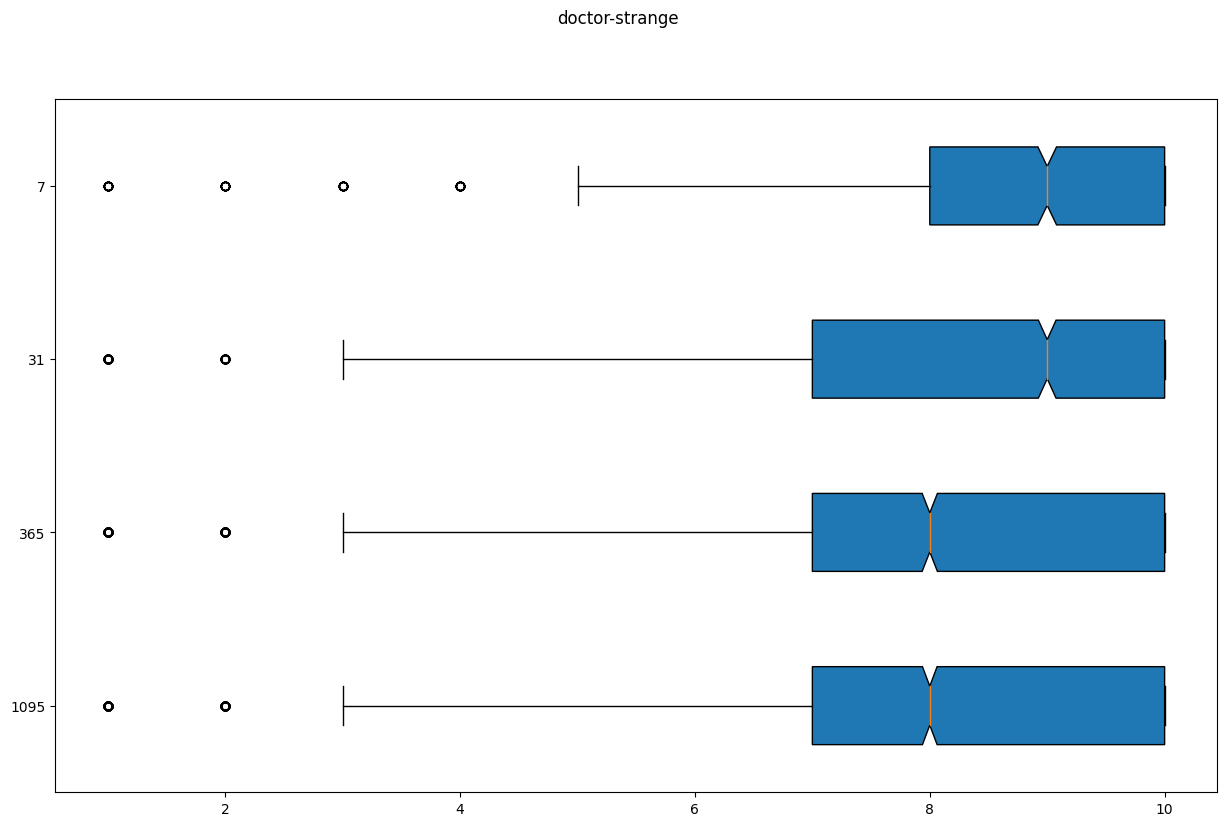

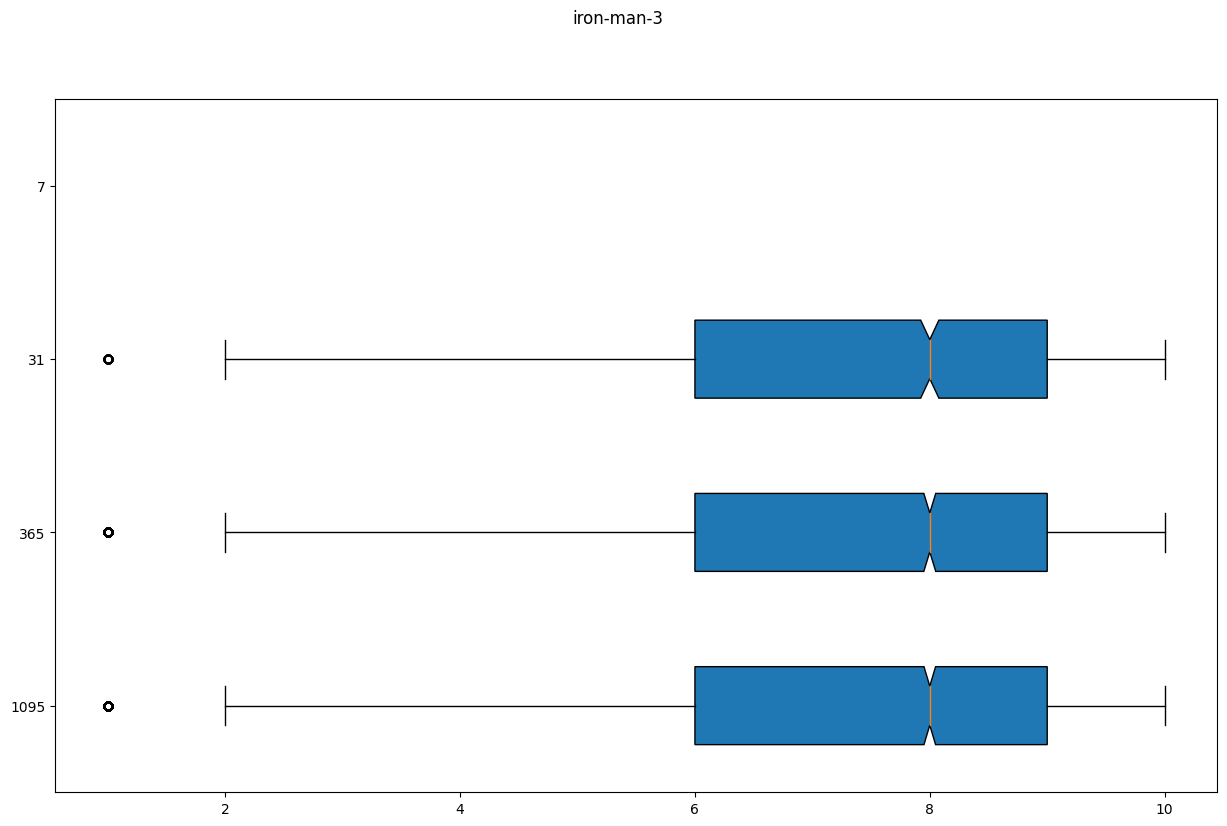

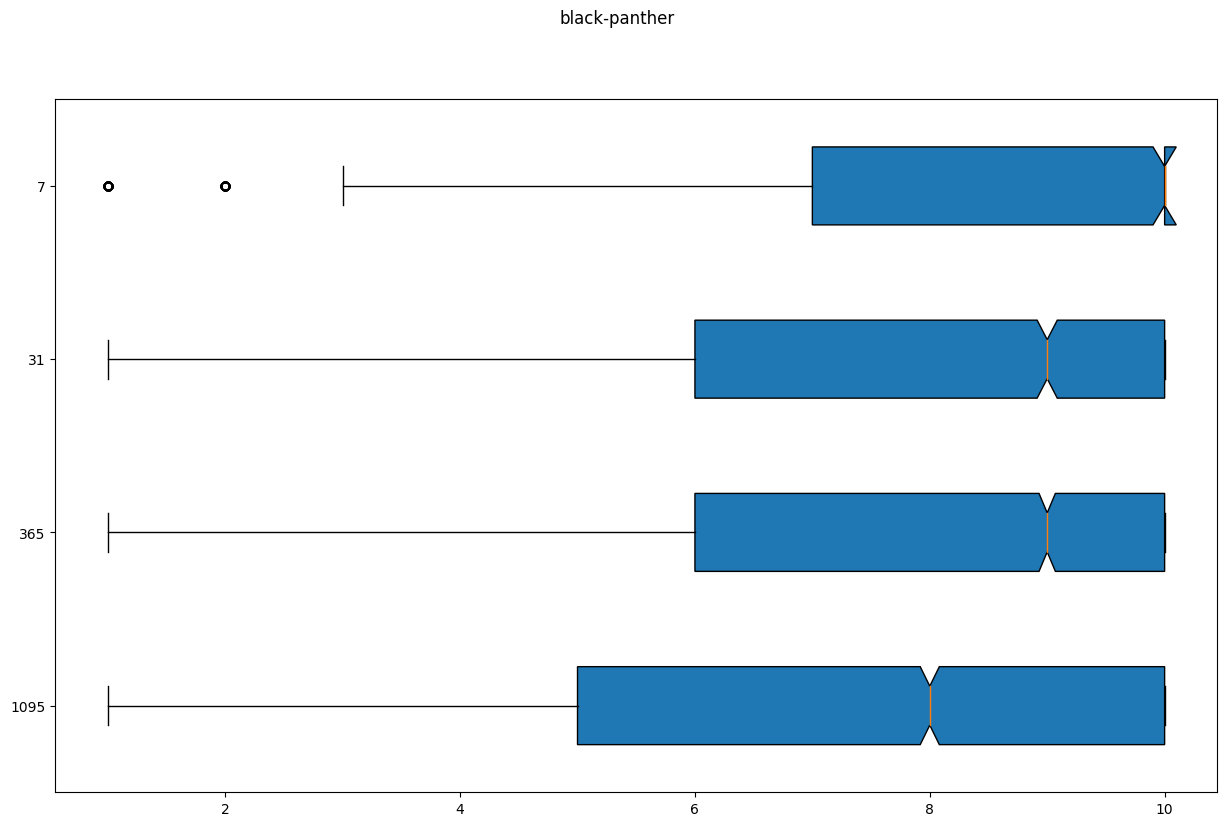

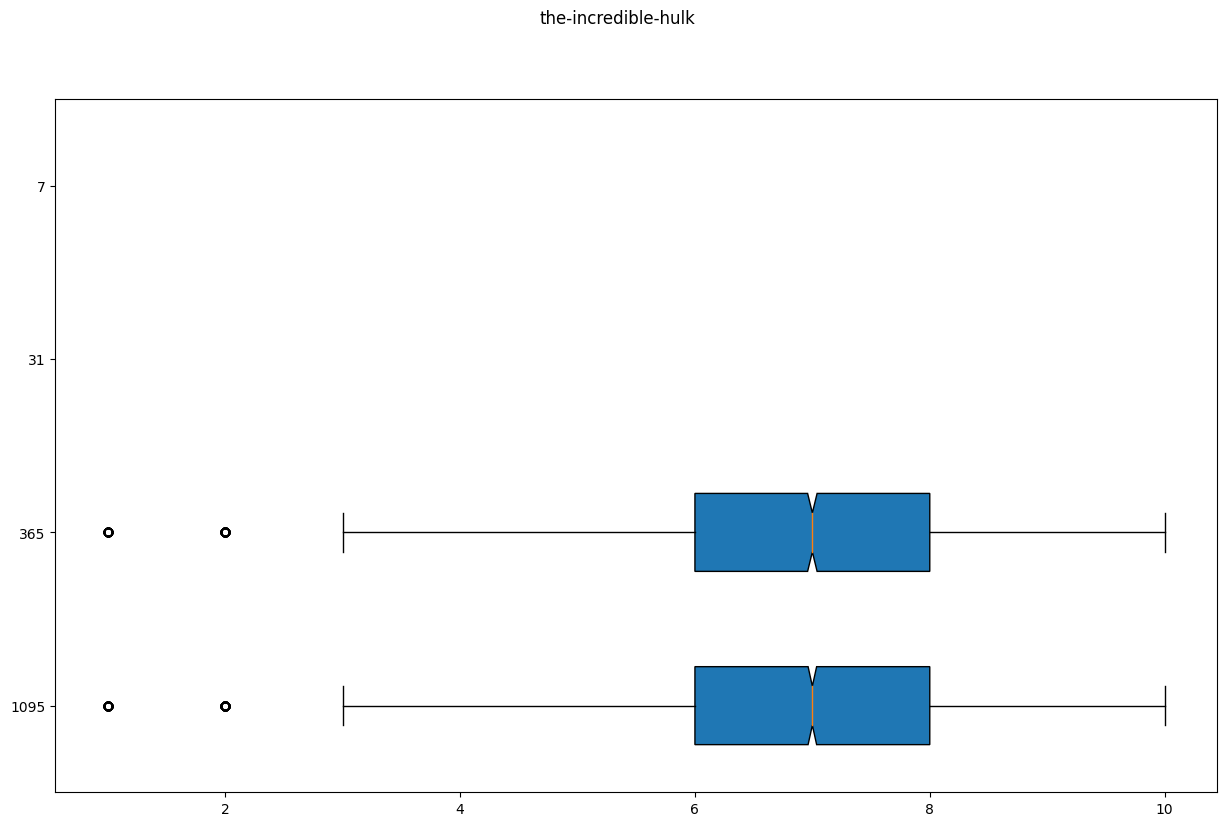

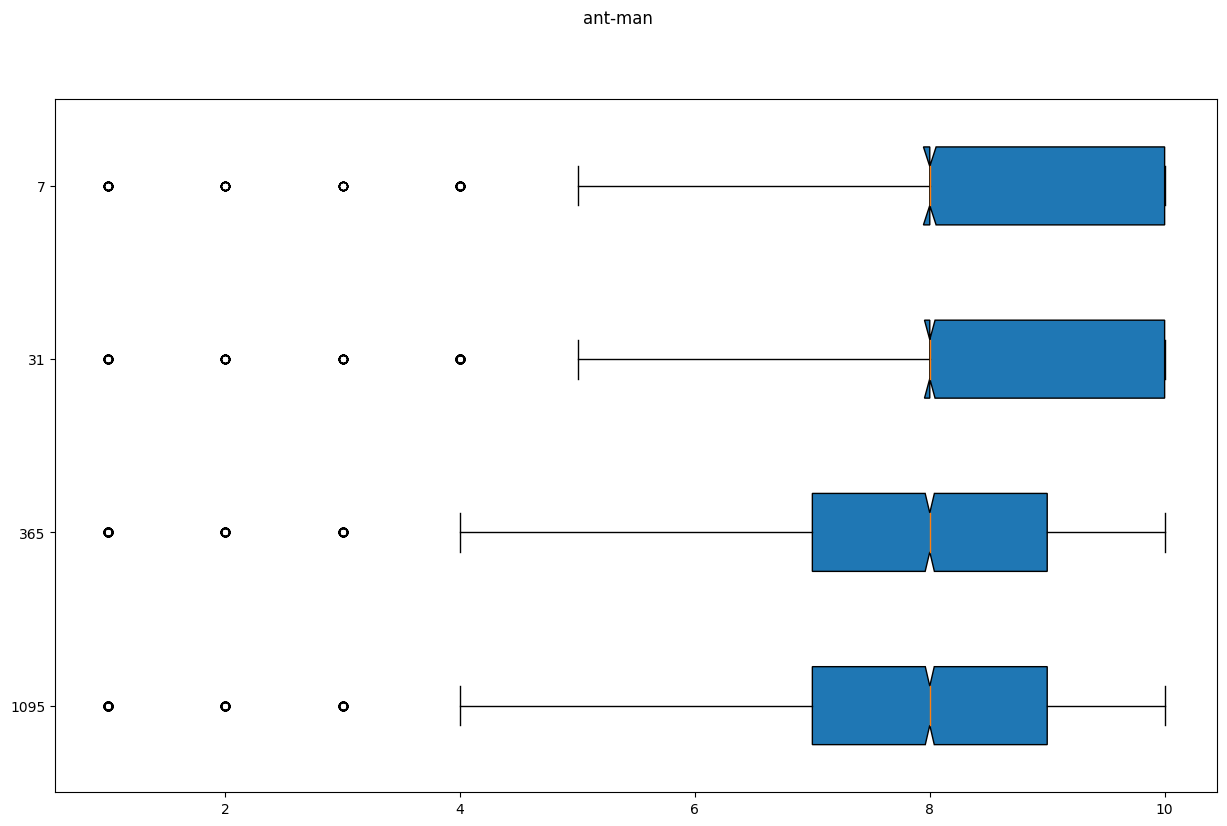

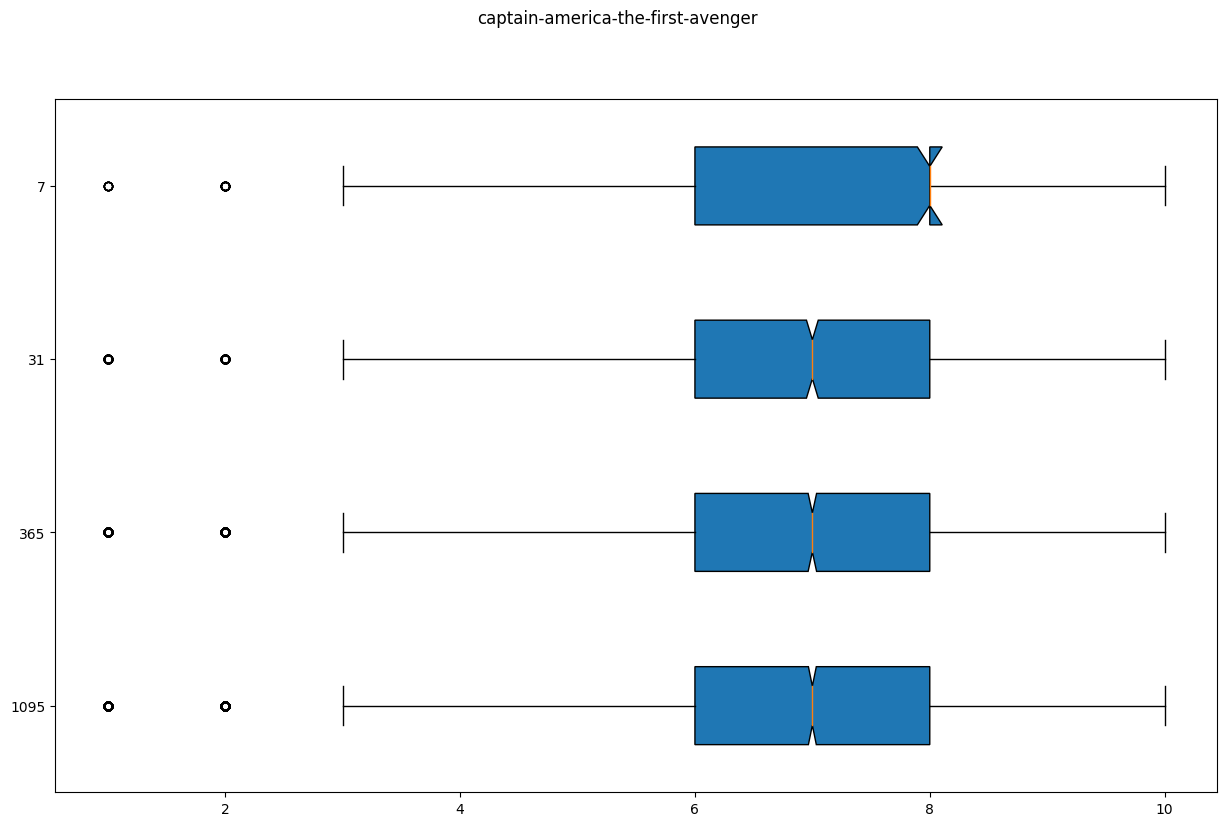

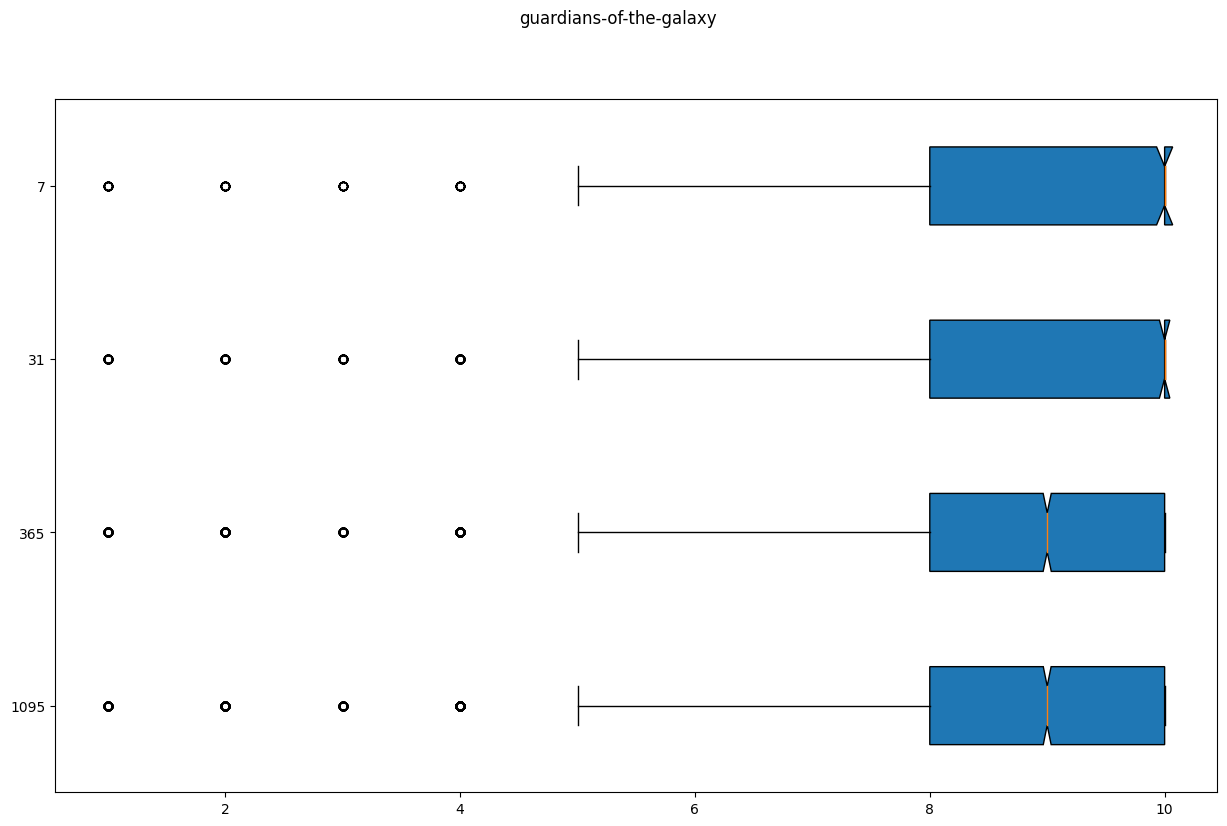

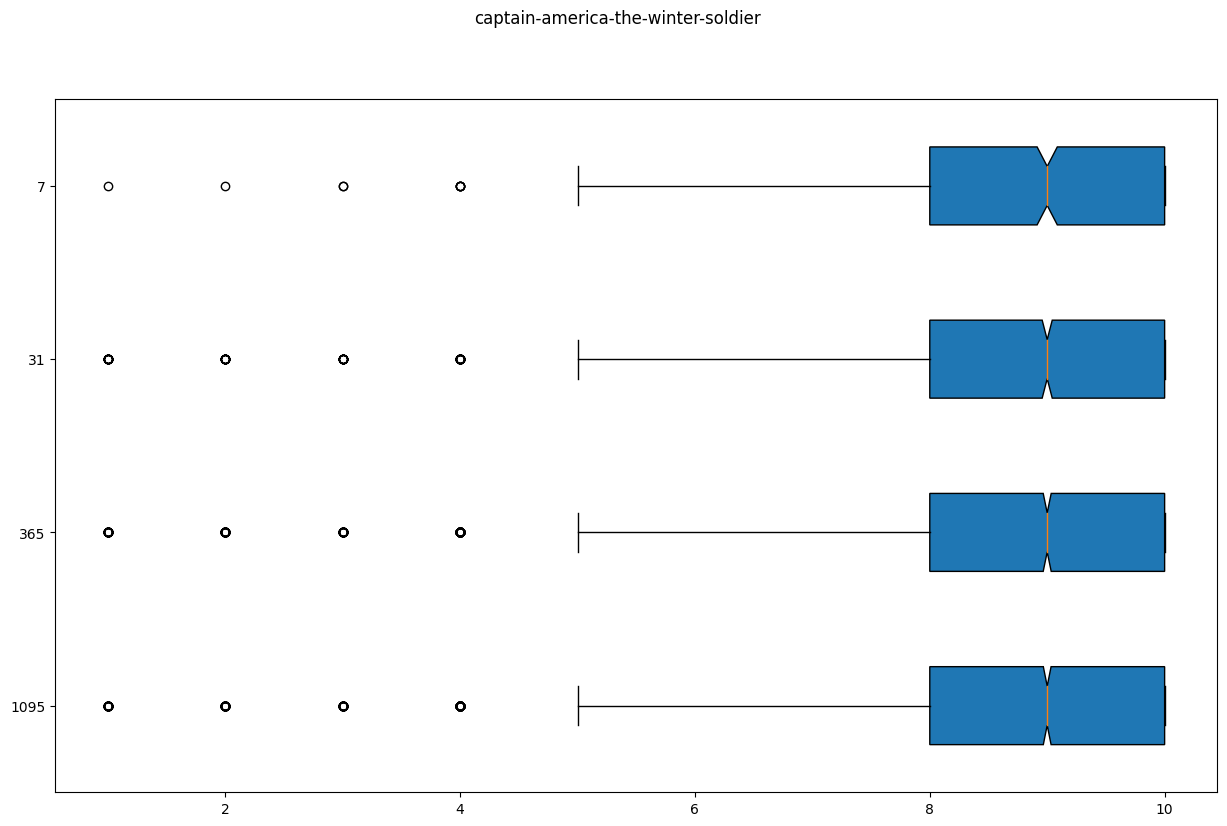

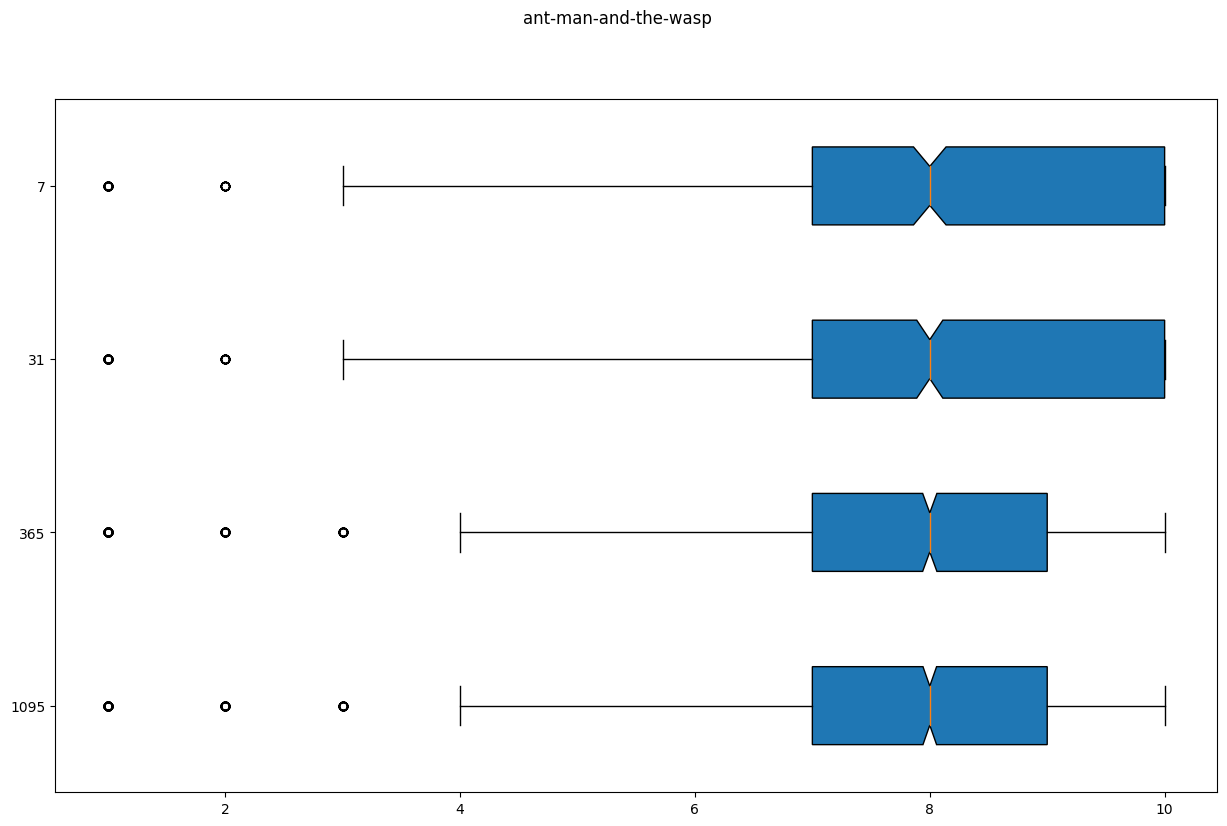

In [16]:
from datetime import datetime, timedelta
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

with open("../data/raw/movie_stats/mcu_list.json", "r") as read_file:
    movie_names = json.load(read_file)

days = [365*3, 365, 31, 7]

for idx, name in enumerate(movie_names):
    time_dfs = []
    movie_df = user_review_df[user_review_df["movie"] == name]
    for day in days:
        movie_df_time = movie_df[movie_df["date"] <= df.loc[idx]["release_date"] + timedelta(days=day) ]["score"]
        # if df.loc[idx]["release_date"] + timedelta(days=day) <= datetime.today():
        #     time_dfs.append(movie_df_time)
        # else:
        #     df_empty = pd.DataFrame().reindex_like(movie_df_time)
        #     print(df_empty)
        #     time_dfs.append(movie_df_time)
        # print(time_dfs)
        time_dfs.append(movie_df_time)
    if movie_df.empty:
        continue
 
# # Creating plot
    fig, ax = plt.subplots(1,1, figsize=(15,9))
    ax.boxplot(time_dfs, labels=days, patch_artist = True,
                notch ='True', vert = 0)
#     # plt.plot(movie_df)
#     # axes2 = plt.twinx()
#     # axes2.plot(movie_df.interpolate(), color="red")
    fig.suptitle(f"{name}")
#     # plt.title(f"review variance: {movie_var}")
    plt.show()

In [37]:
critic_review_df = pd.read_csv("../data/raw/reviews/RT_critics.csv")

critic_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")

critic_review_df.head()

movie              user  is_rotten       date  \
0  ant-man-and-the-wasp-quantumania  Jeffrey Peterson      False 2023-10-21   
1  ant-man-and-the-wasp-quantumania         Lee Zumpe      False 2023-10-20   
2  ant-man-and-the-wasp-quantumania       Cris Parker      False 2023-10-20   
3  ant-man-and-the-wasp-quantumania     Sarah Vincent       True 2023-10-18   
4  ant-man-and-the-wasp-quantumania      Rick Bentley       True 2023-10-17   

                                                text  \
0  Ant-Man and the Wasp: Quantumania is a film th...   
1  It may feel like the director ordered a truckl...   
2  While I still like the film overall. Every MCU...   
3  the two-dimensional supporting characters and ...   
4  The errors are easy to miss because the script...   

                                                 url scrape date  
0  https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
1  https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
2  https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
3  https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20  
4  https://www.rottentomatoes.com/m/ant_man_and_t...  2023-10-20

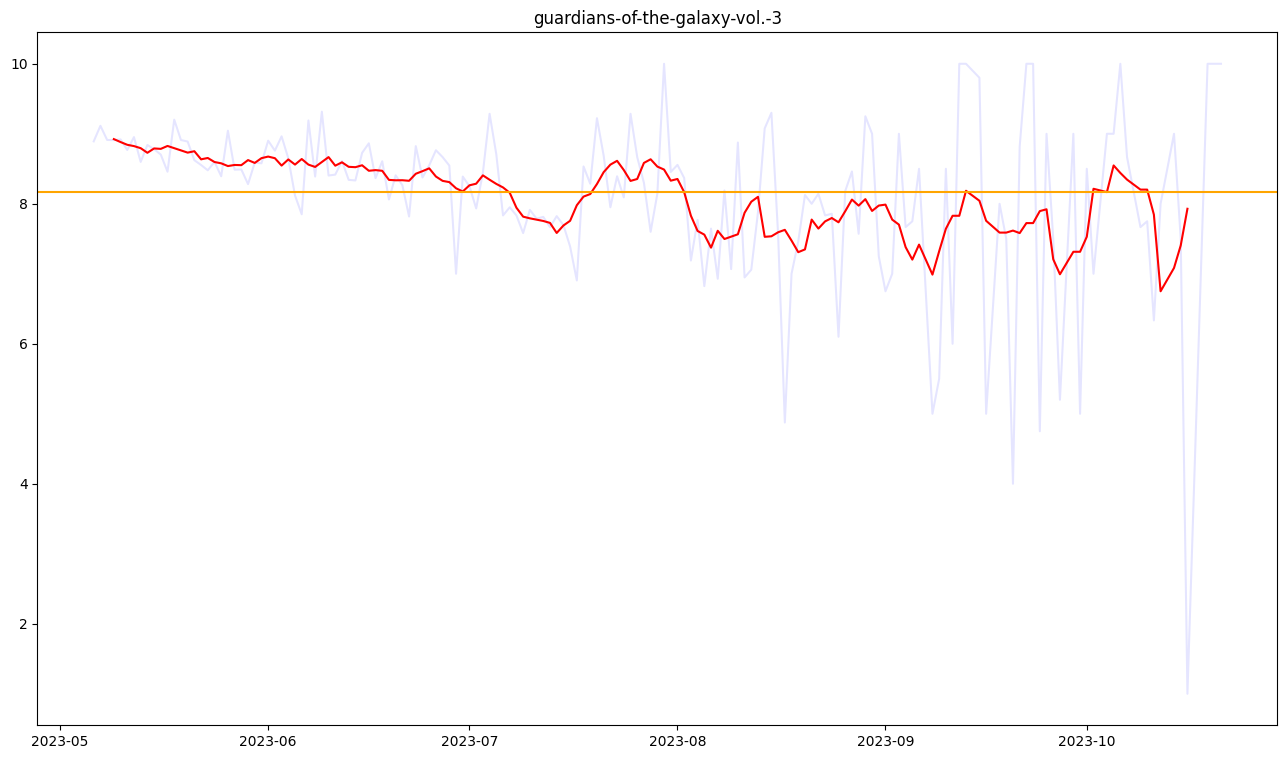

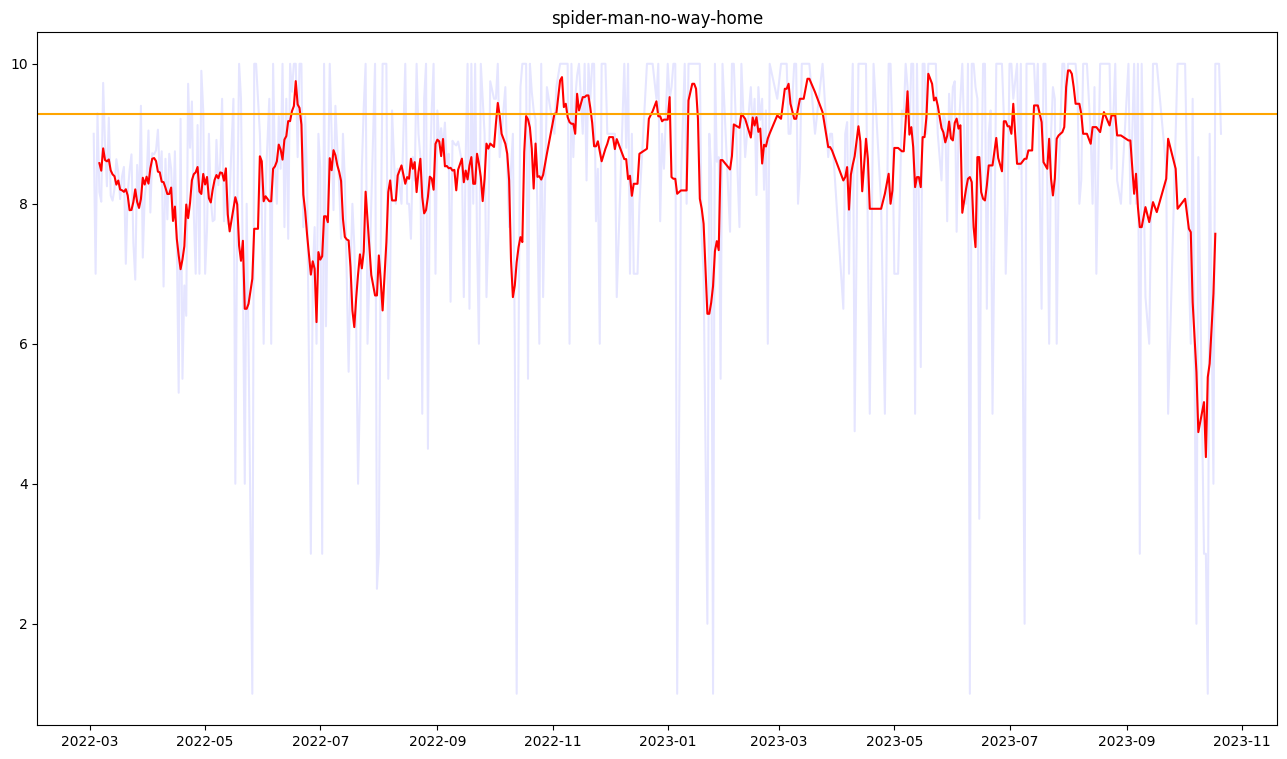

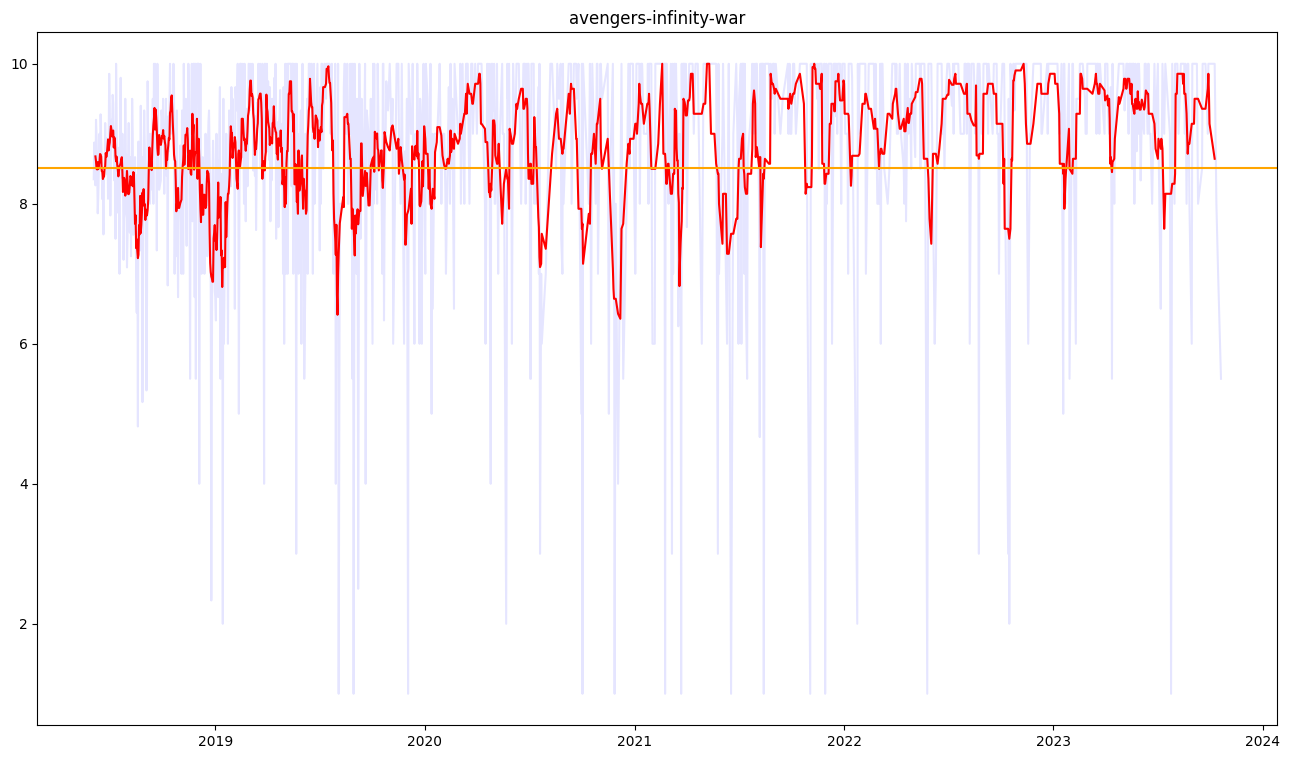

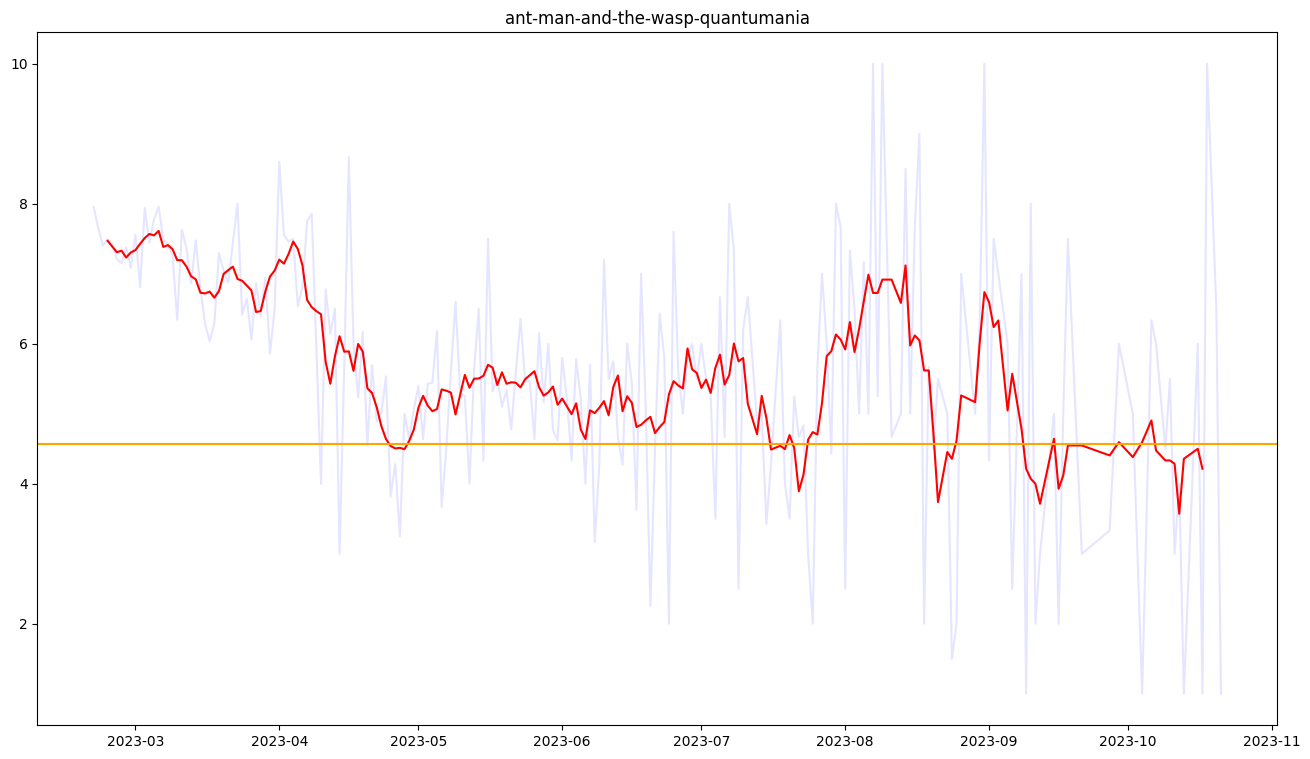

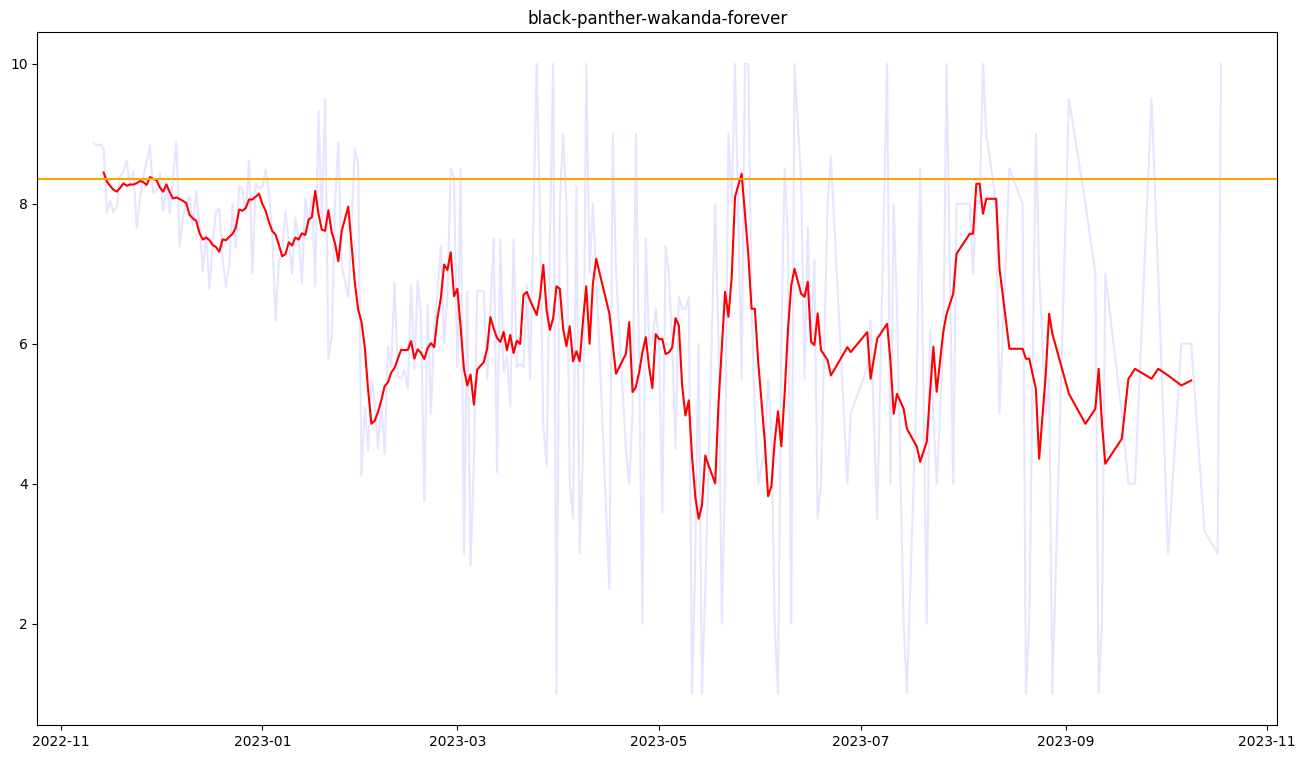

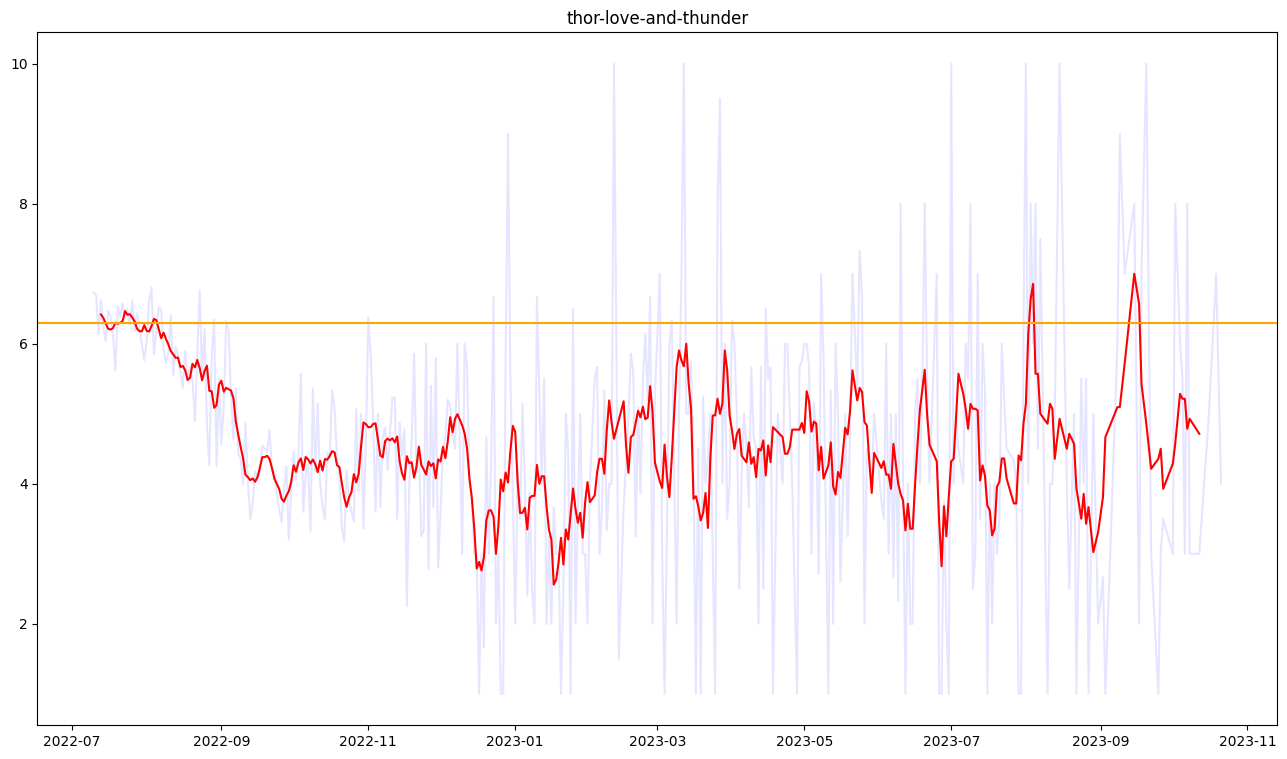

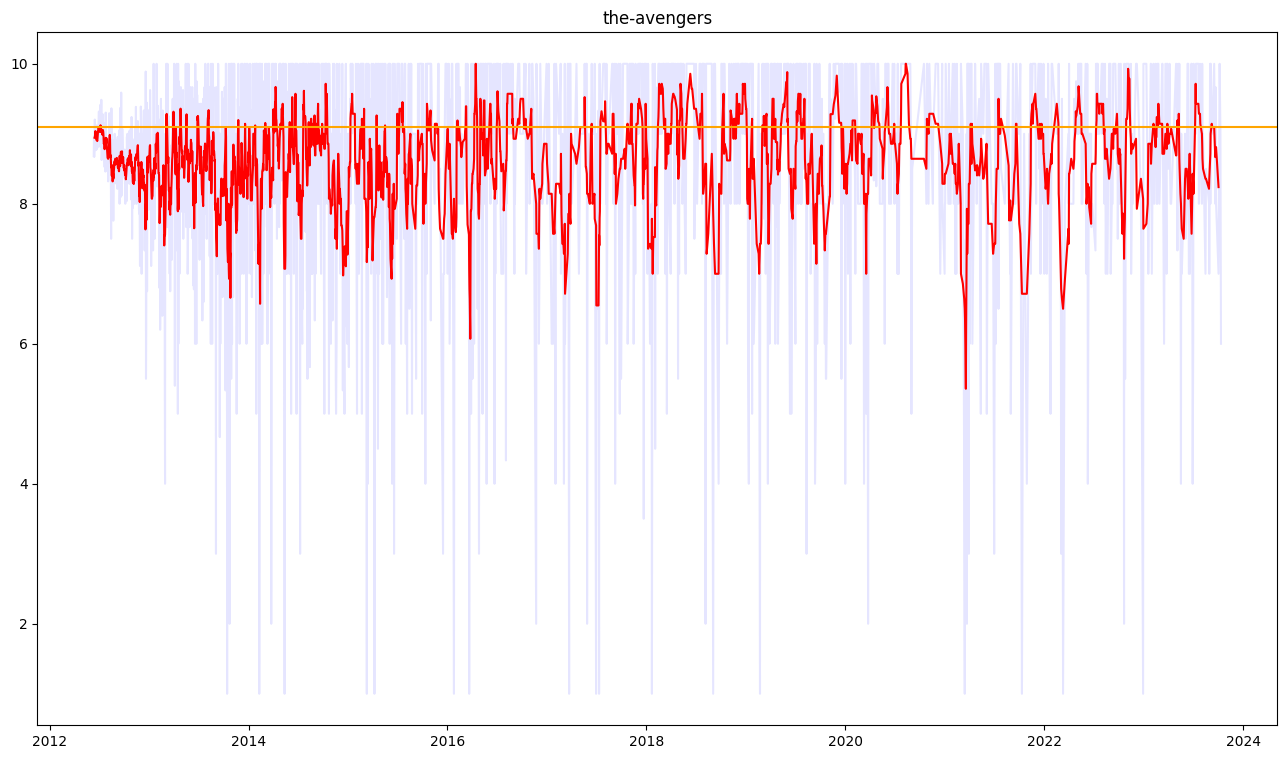

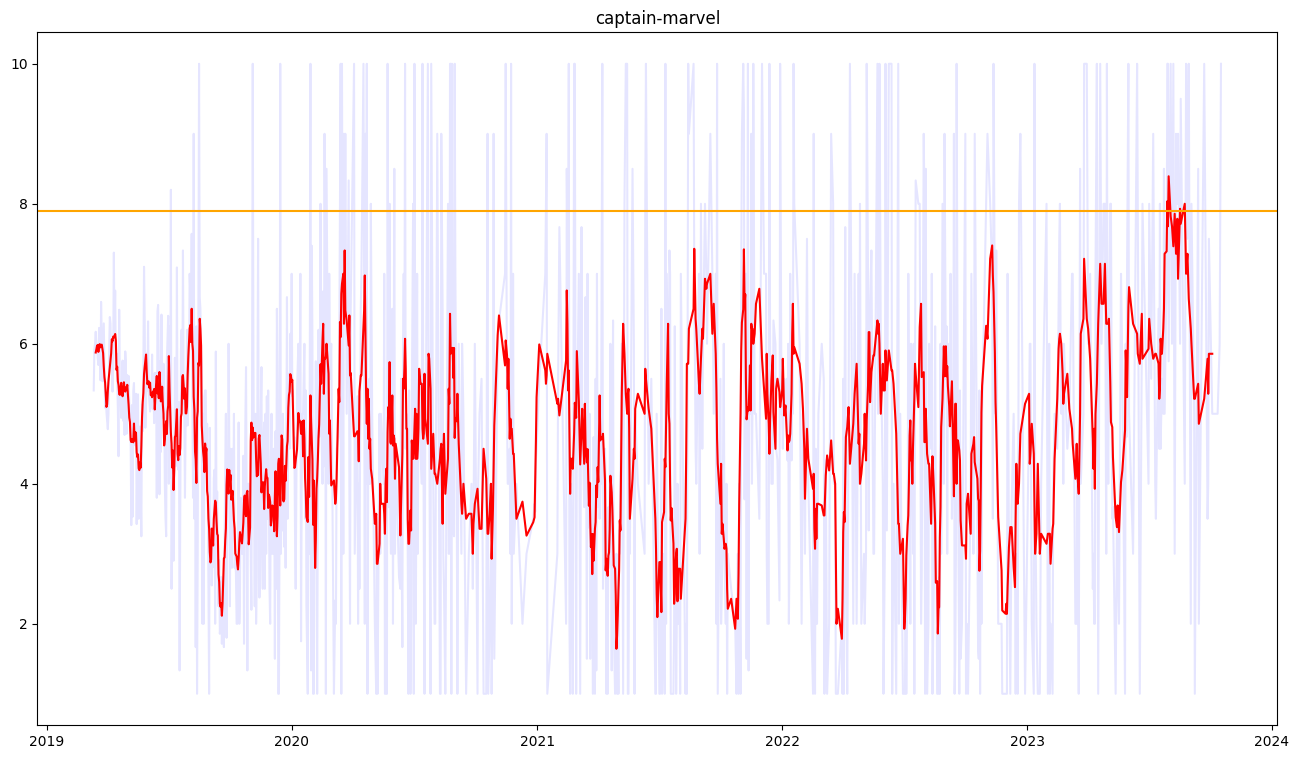

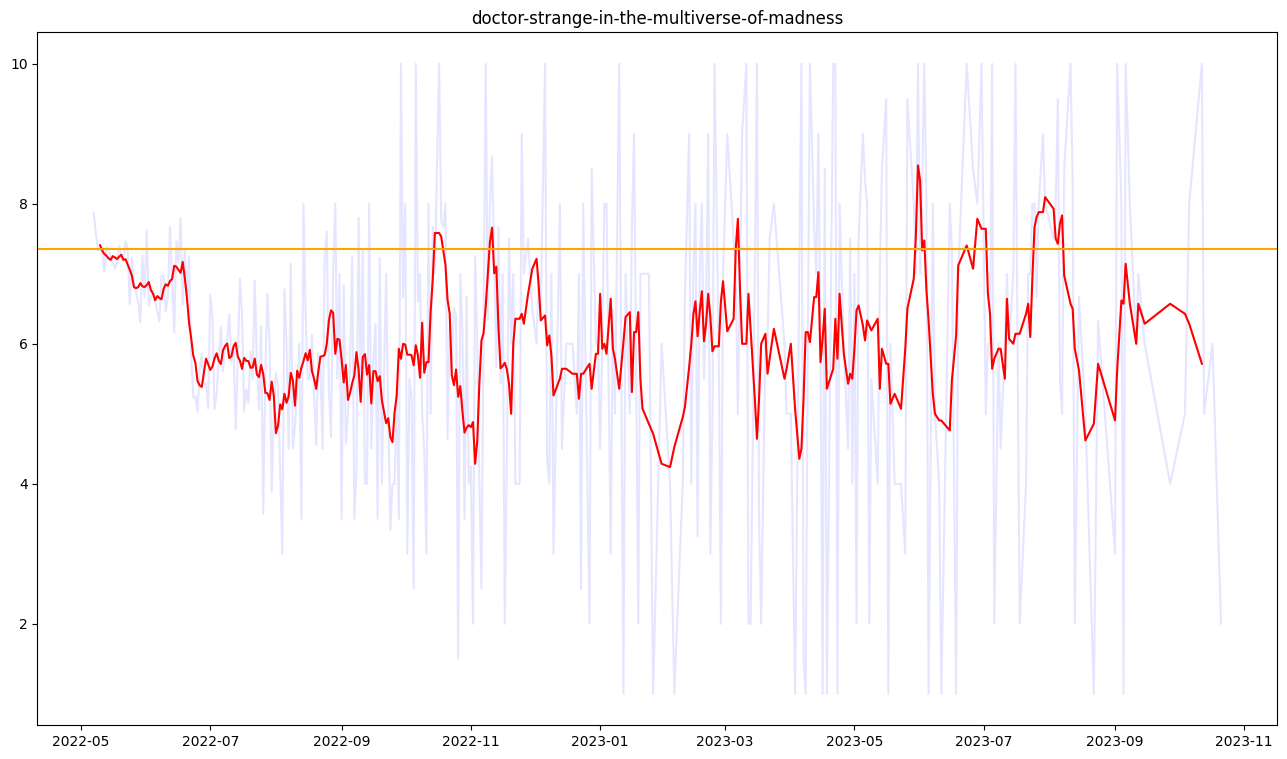

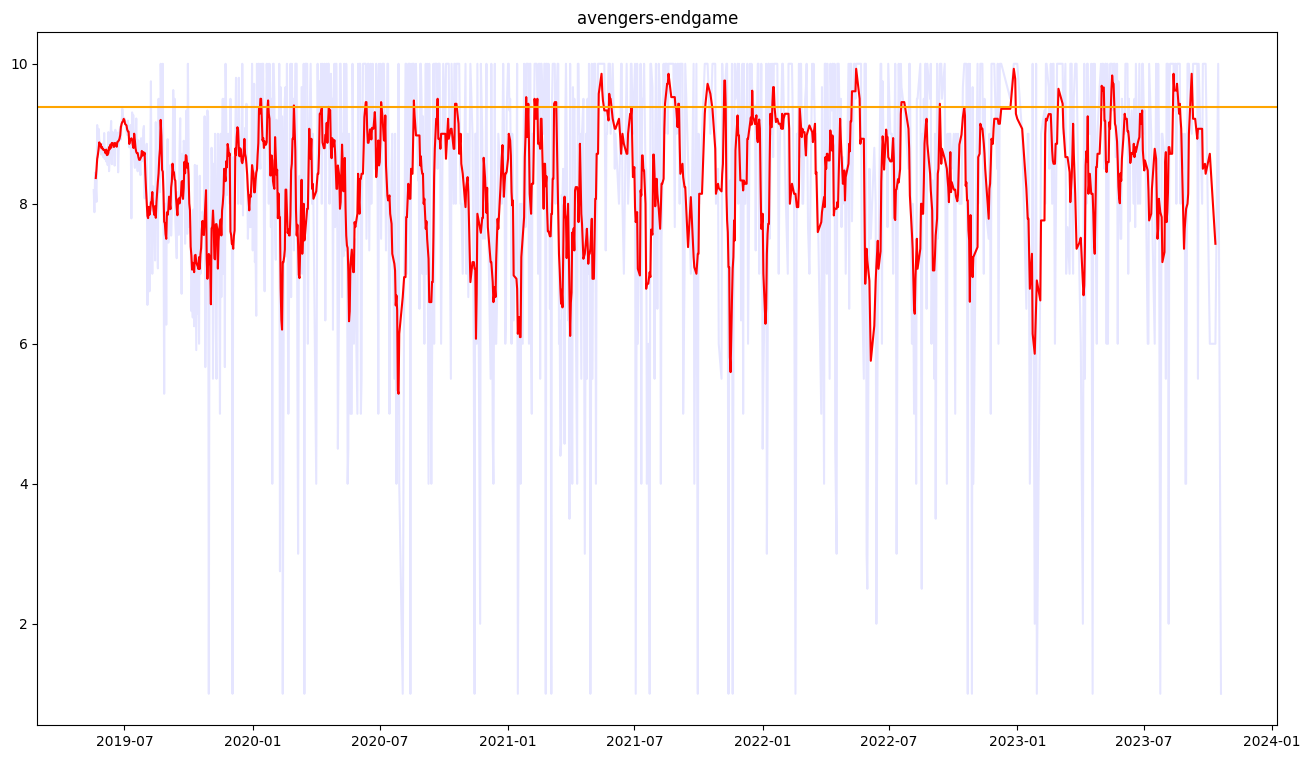

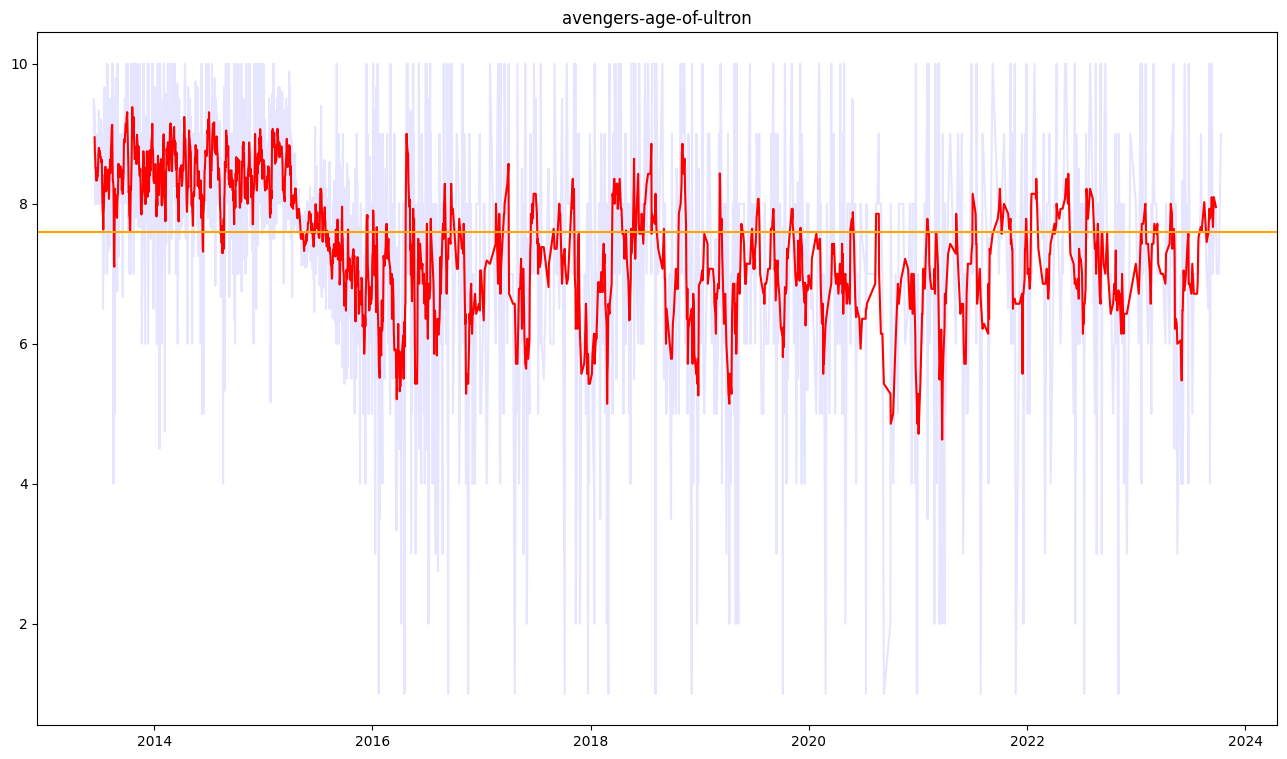

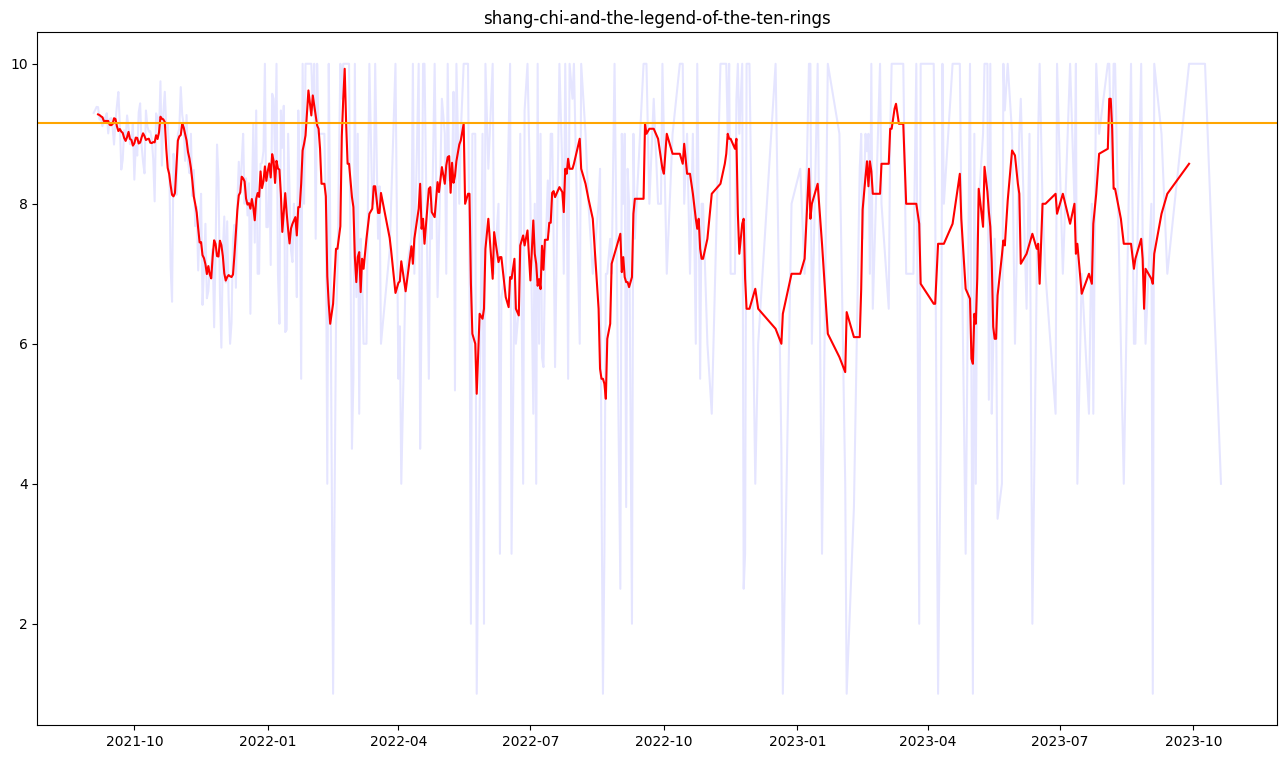

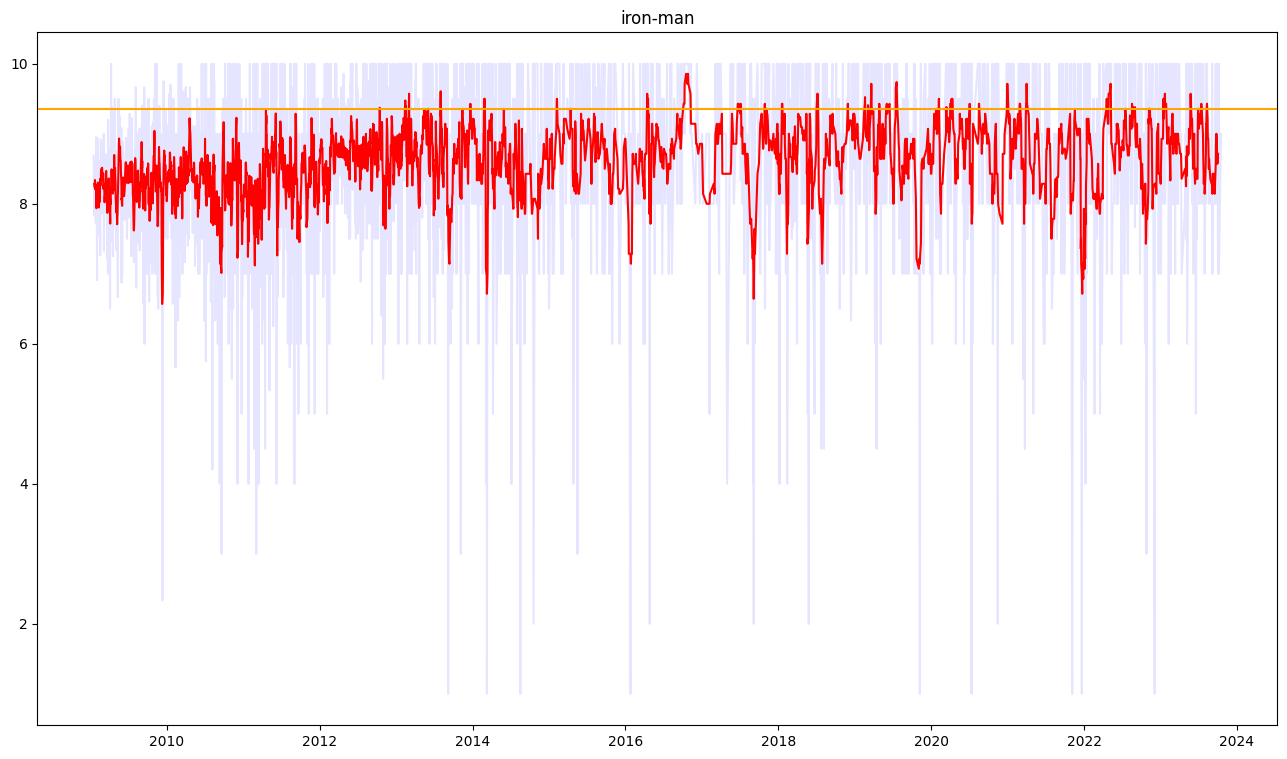

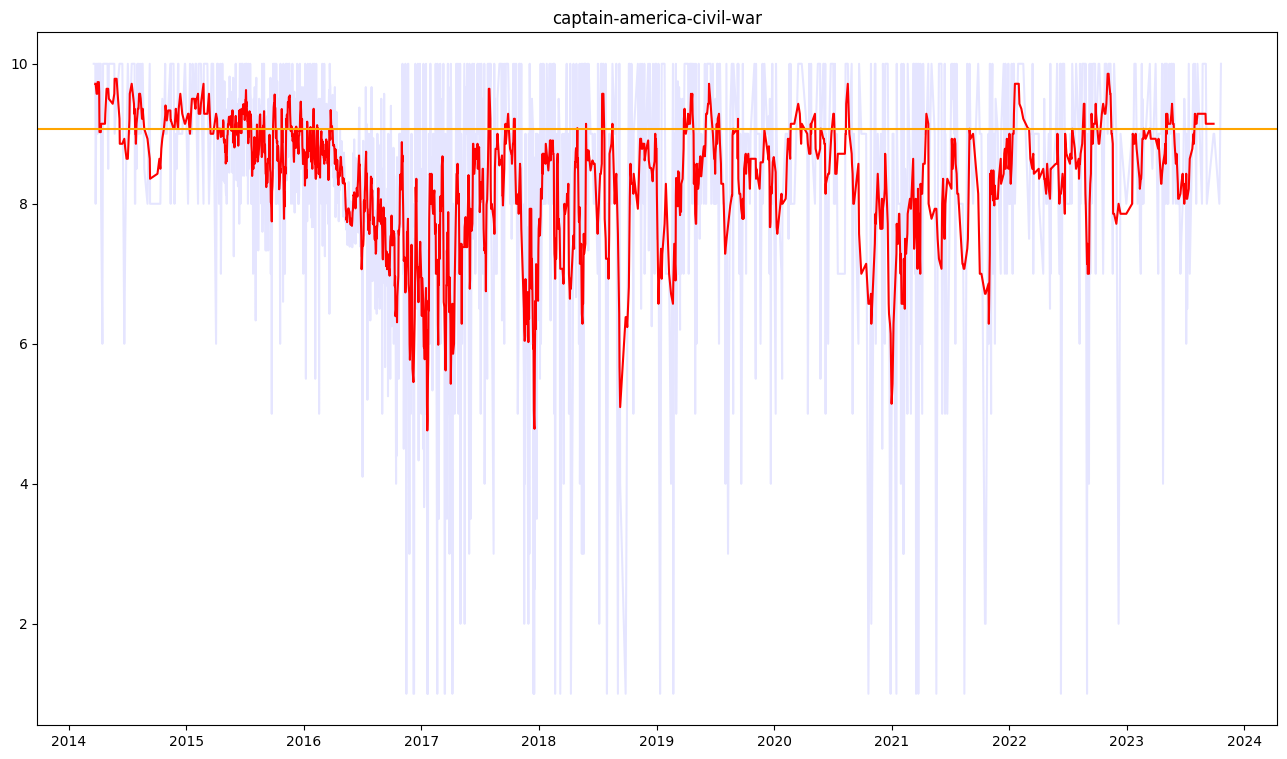

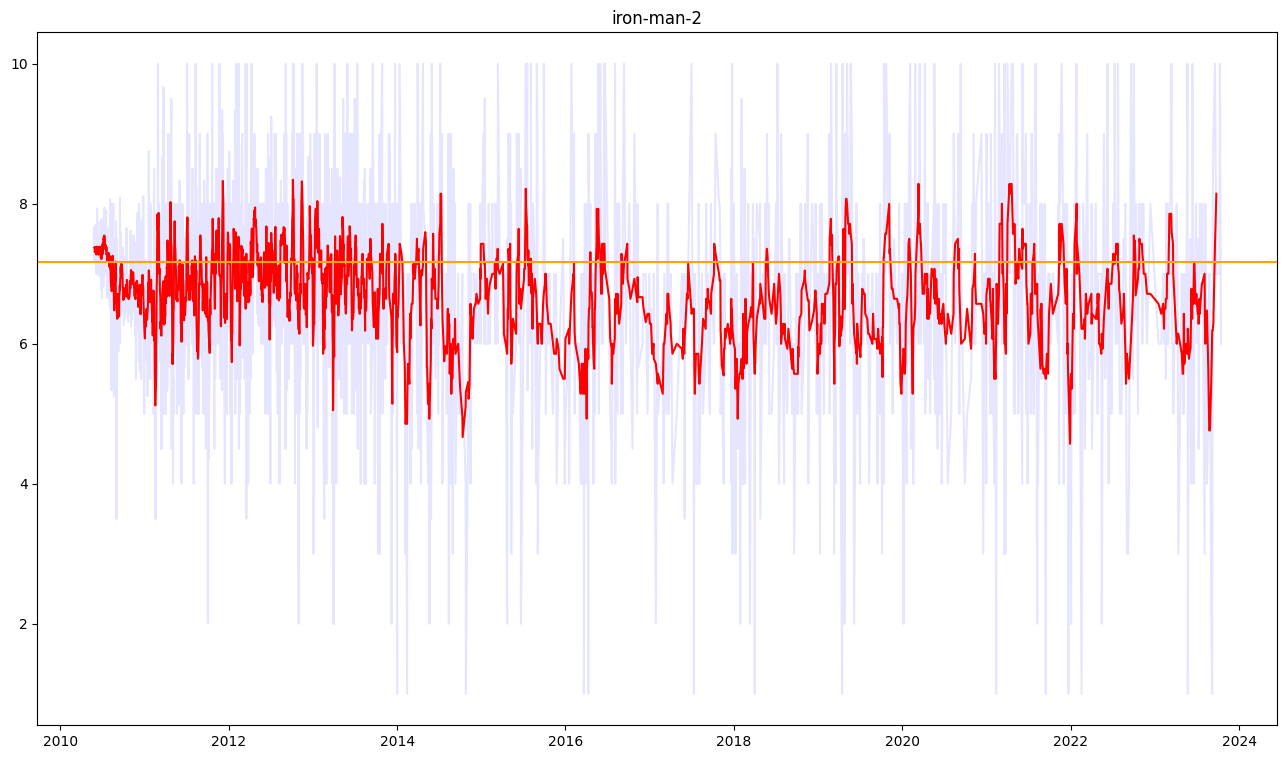

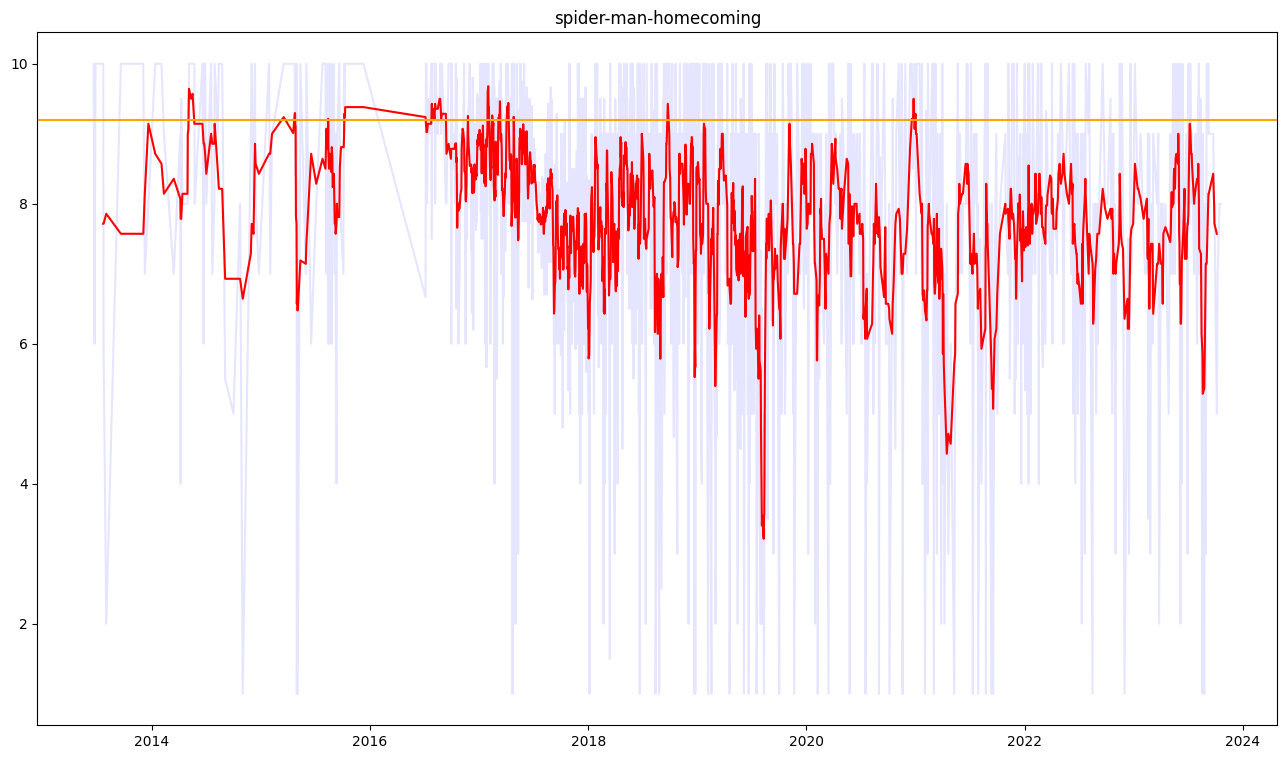

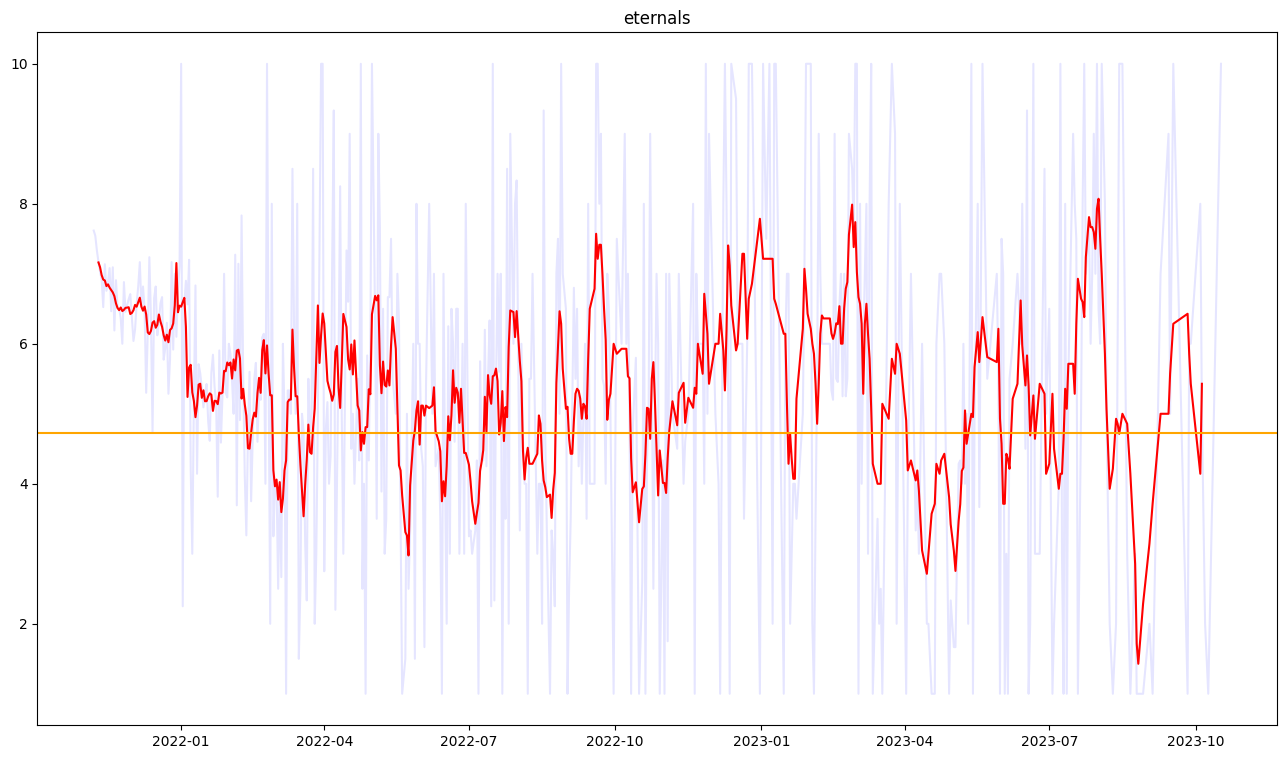

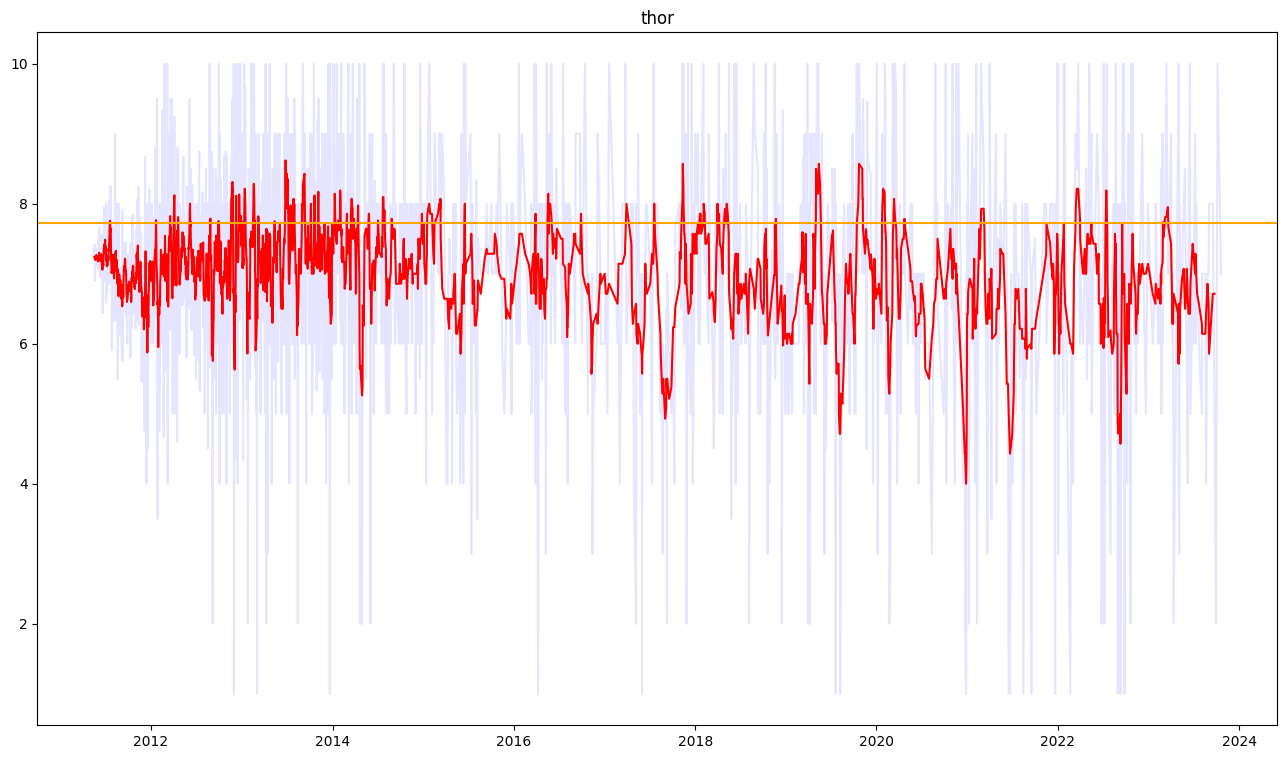

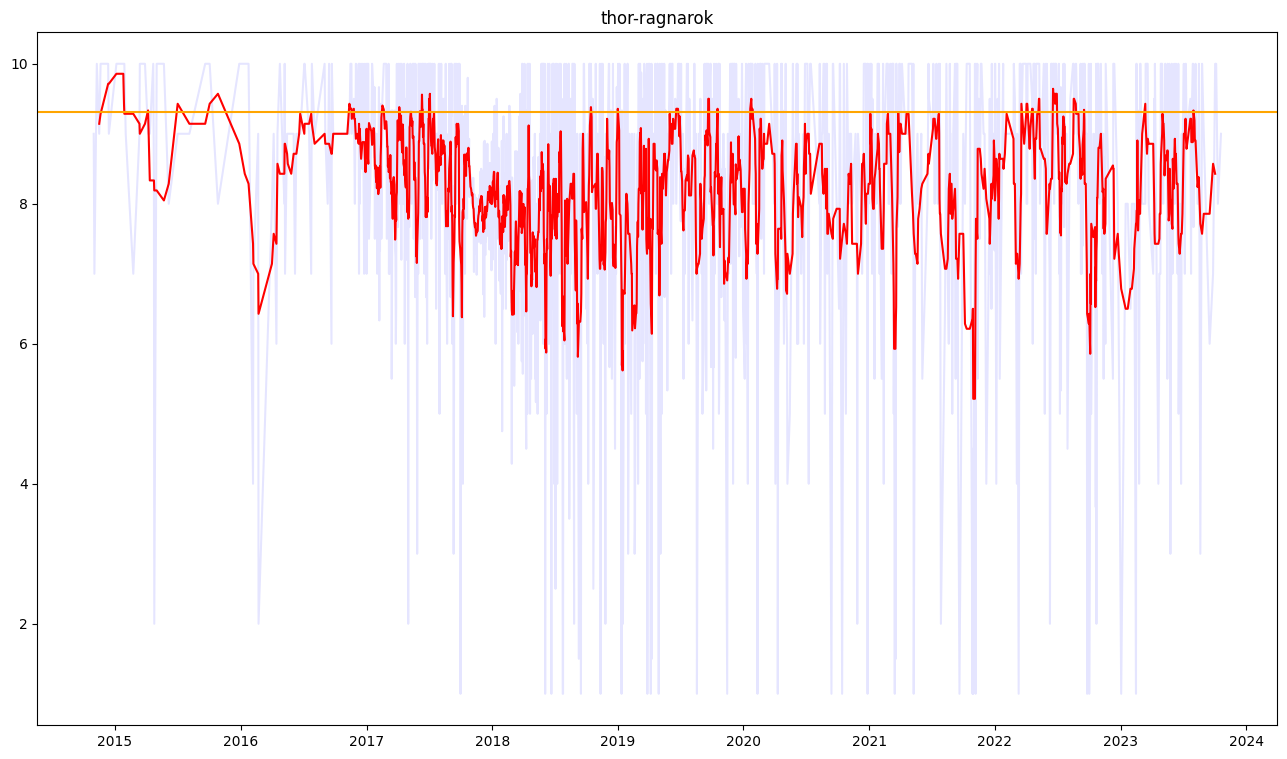

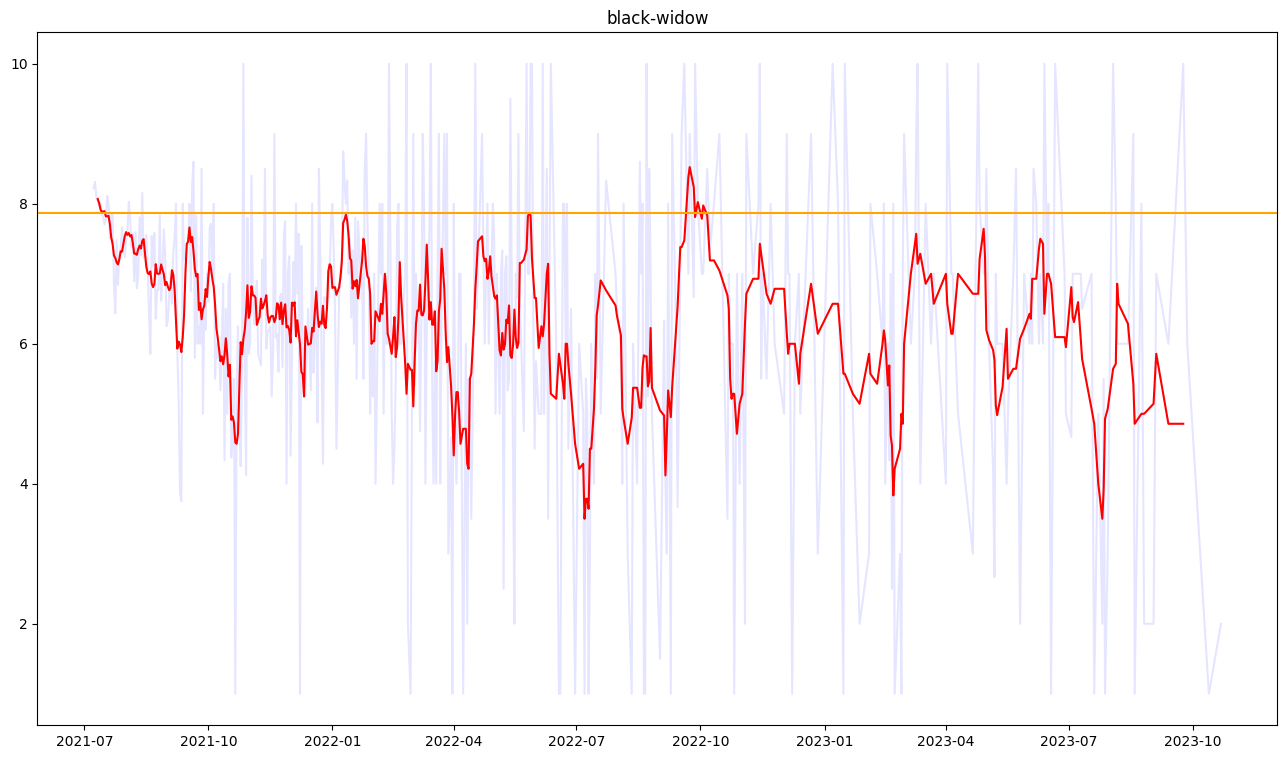

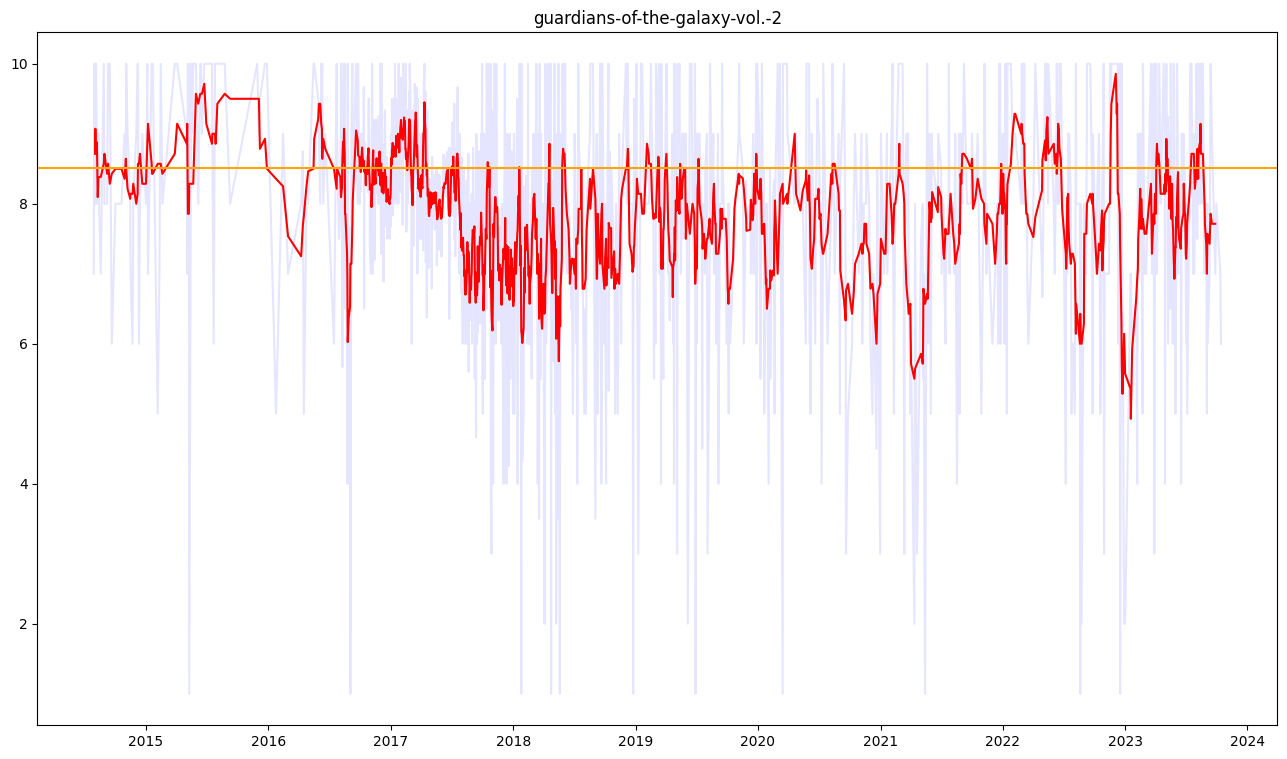

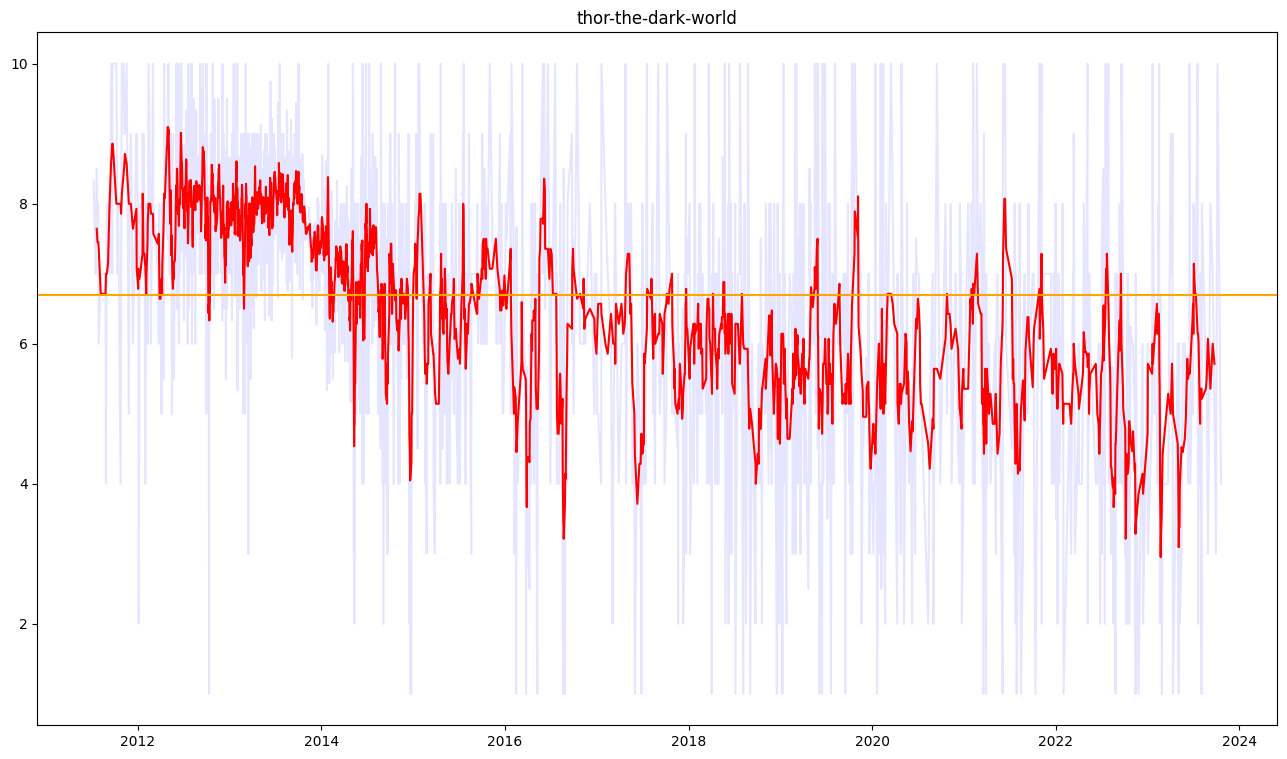

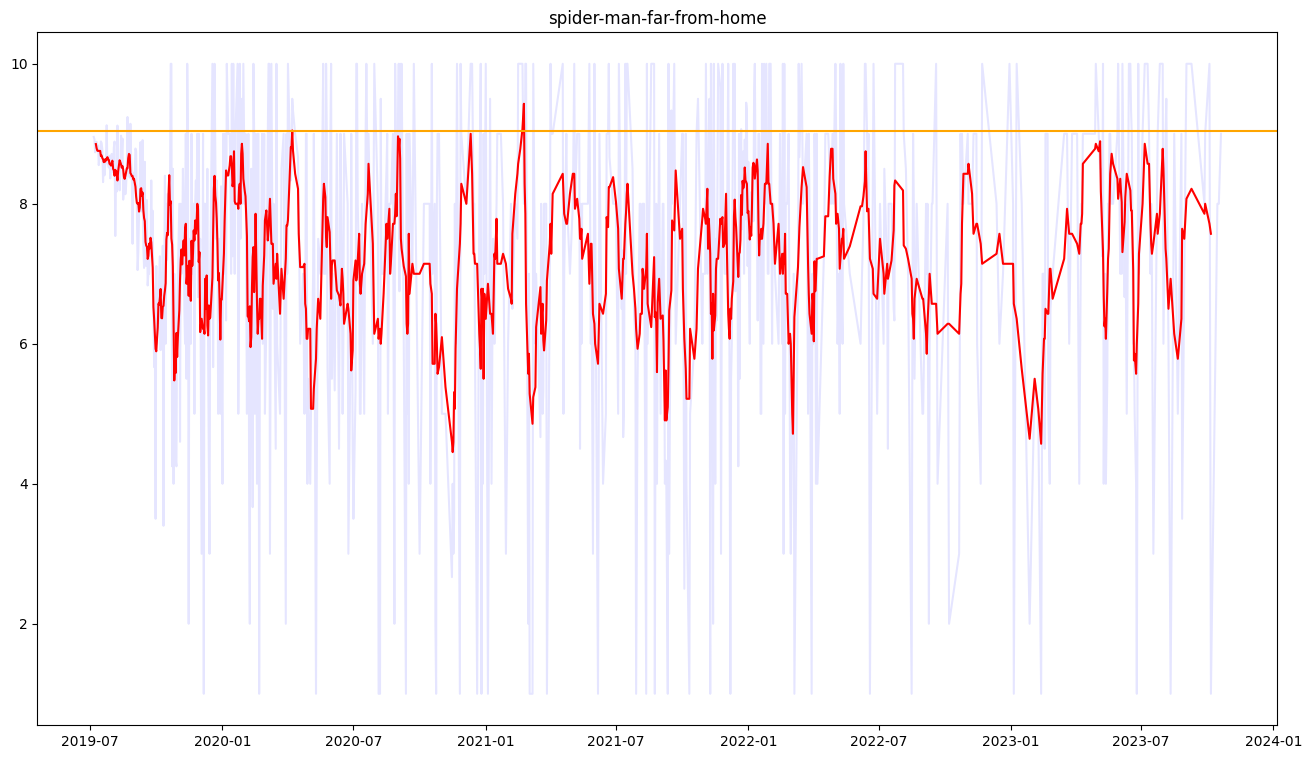

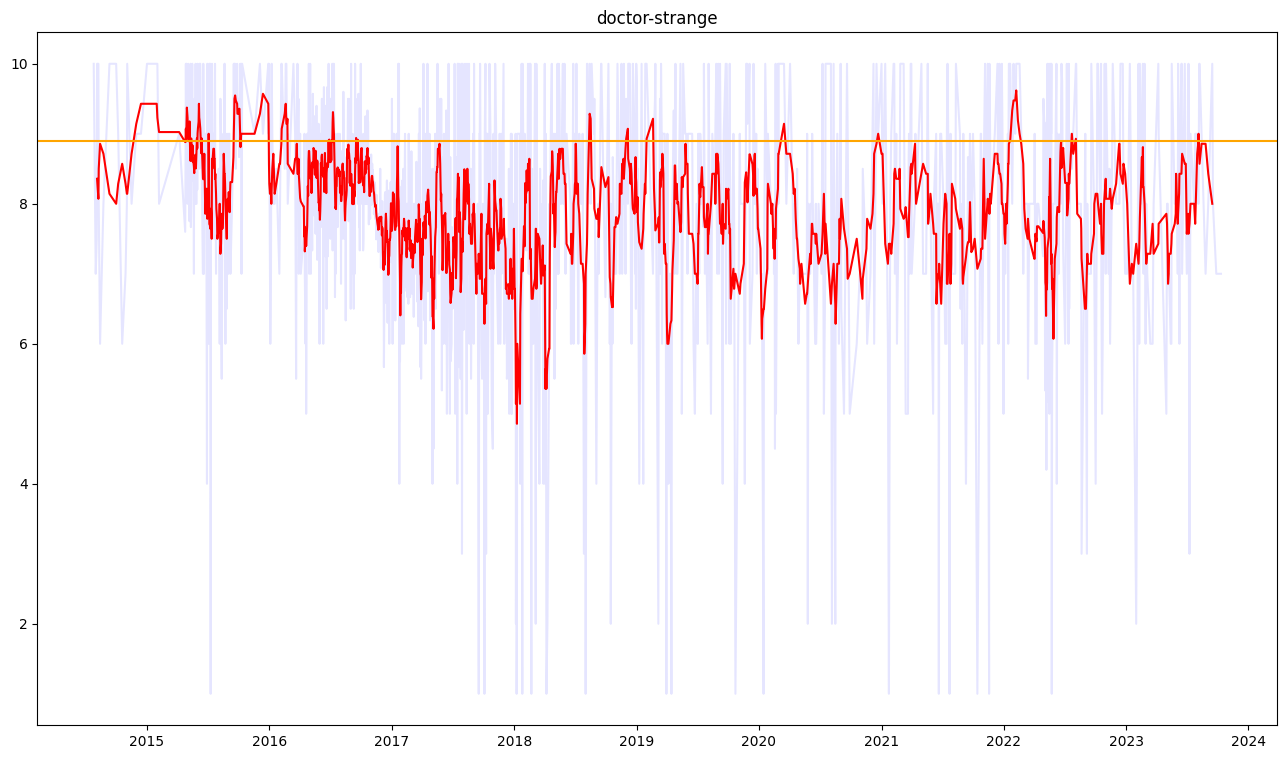

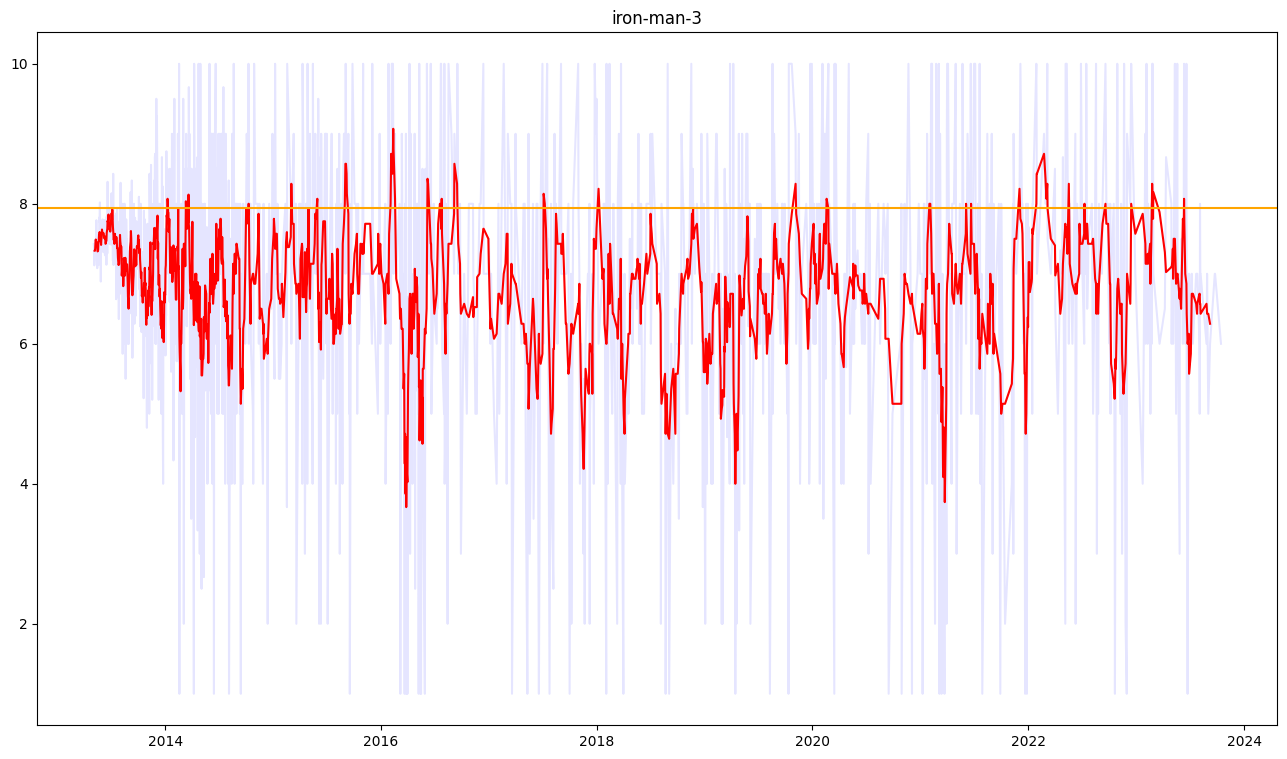

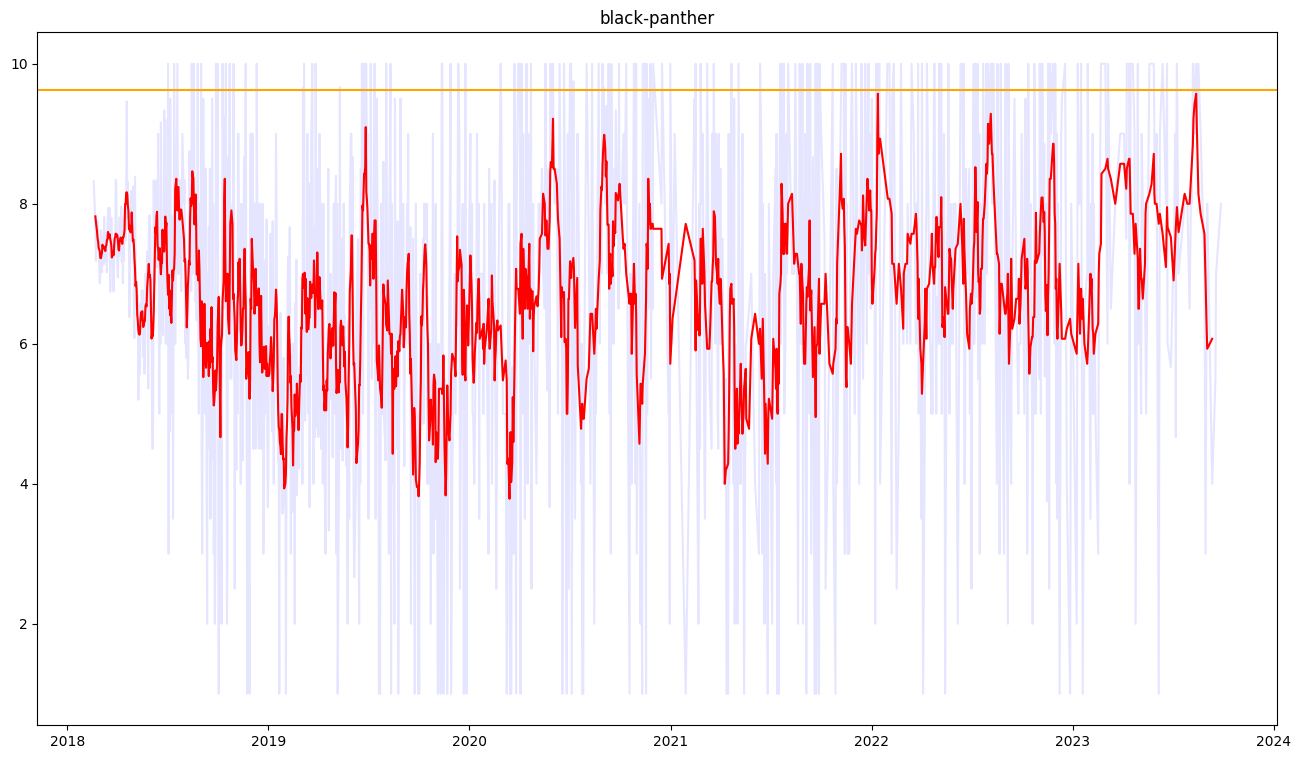

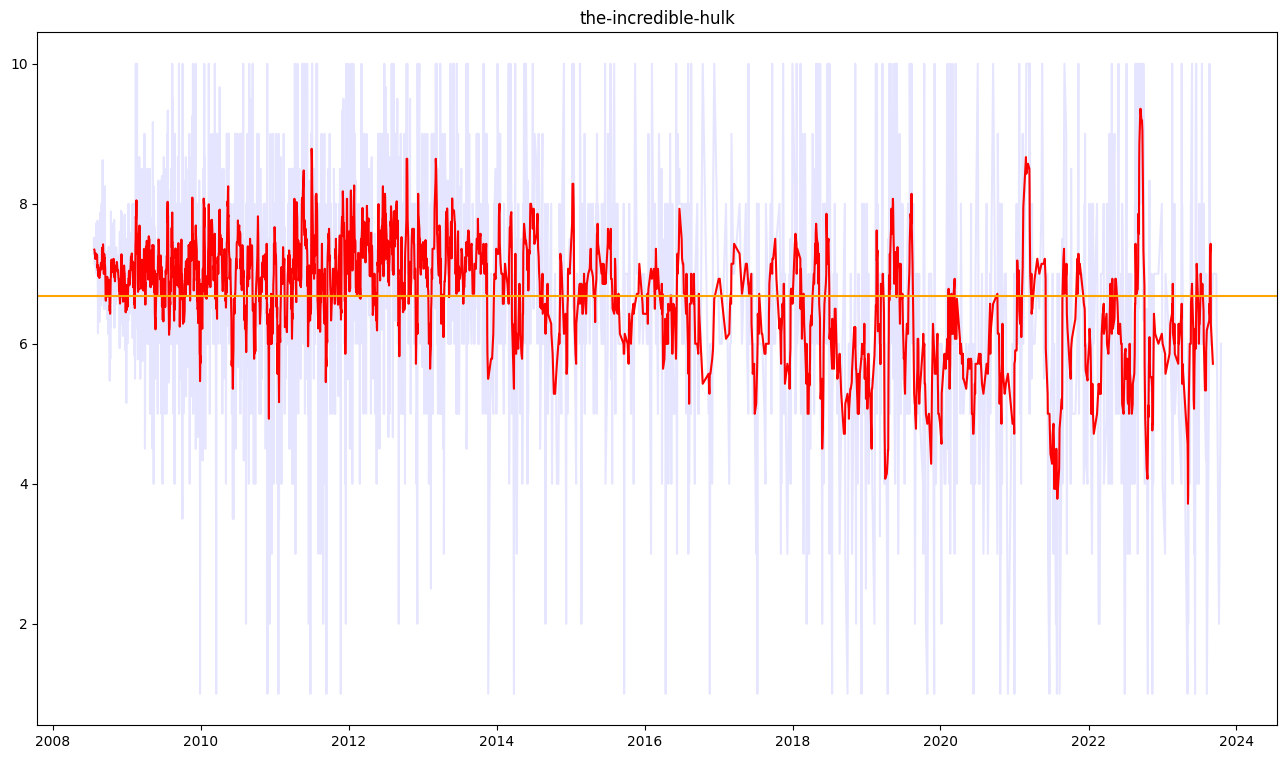

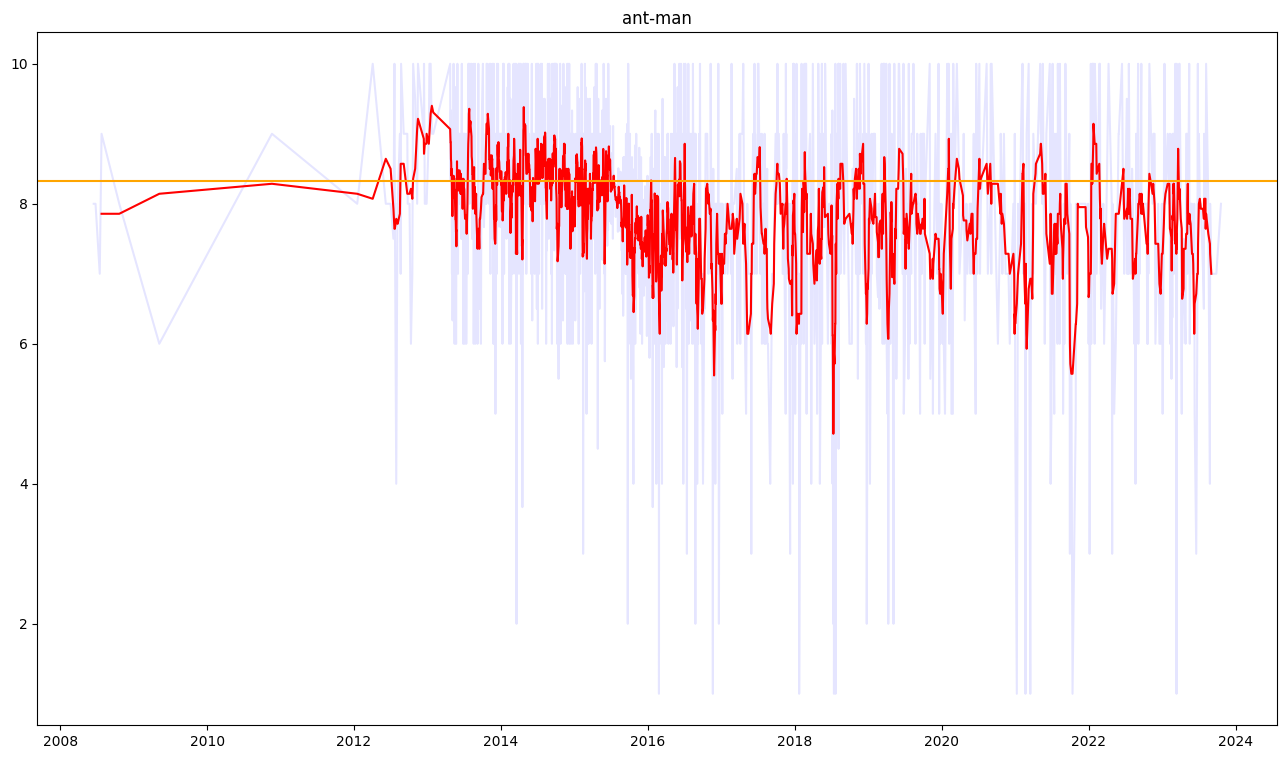

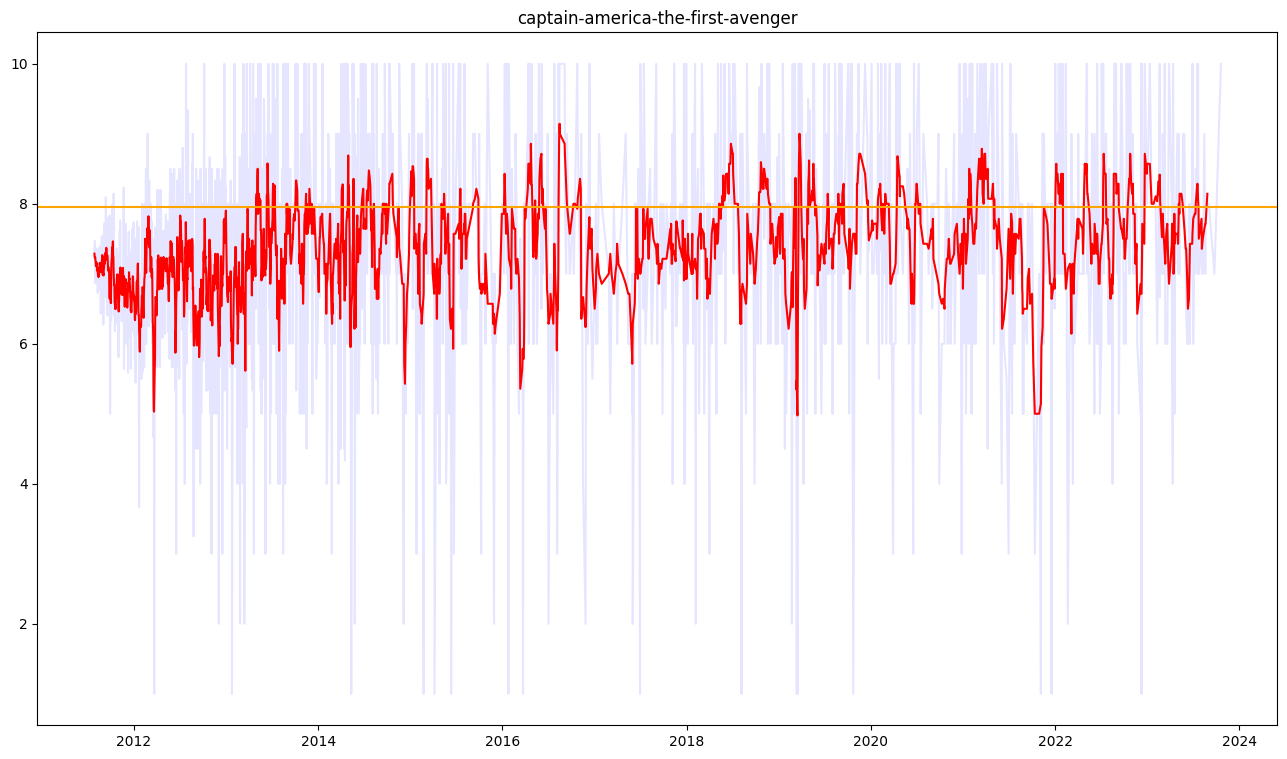

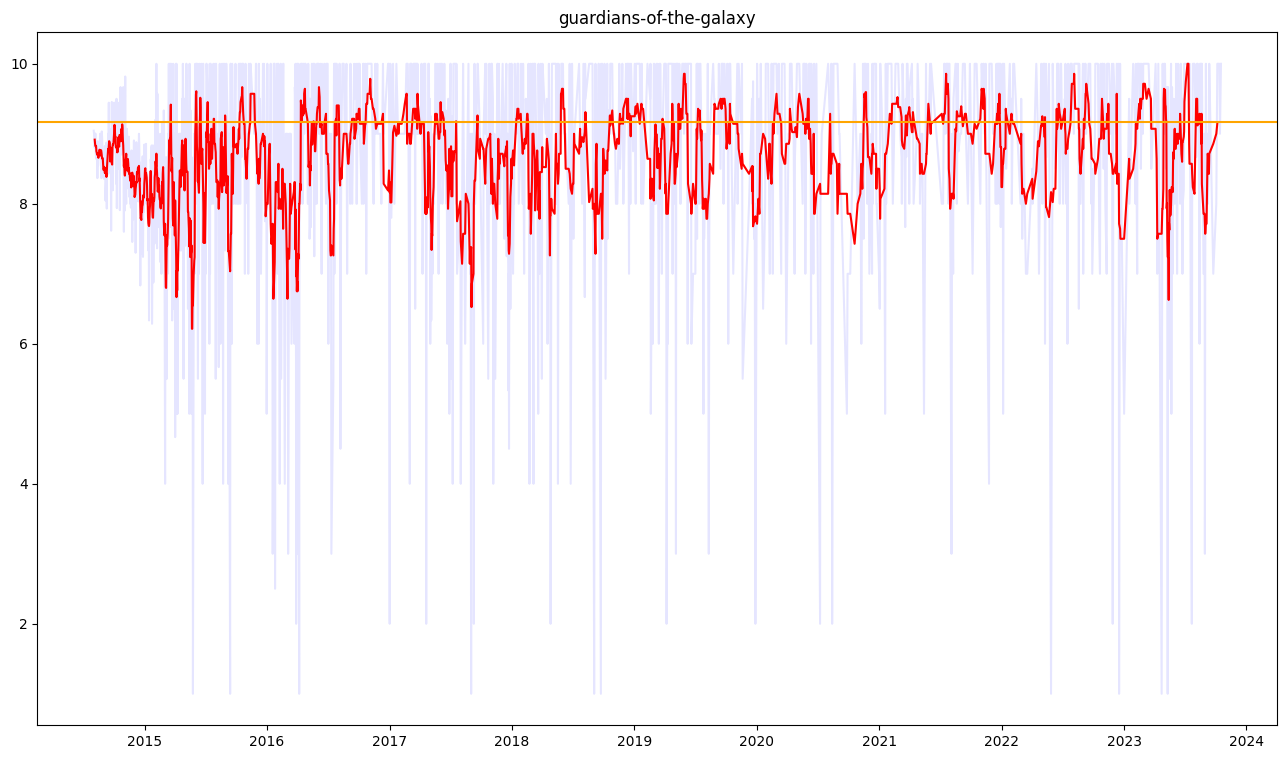

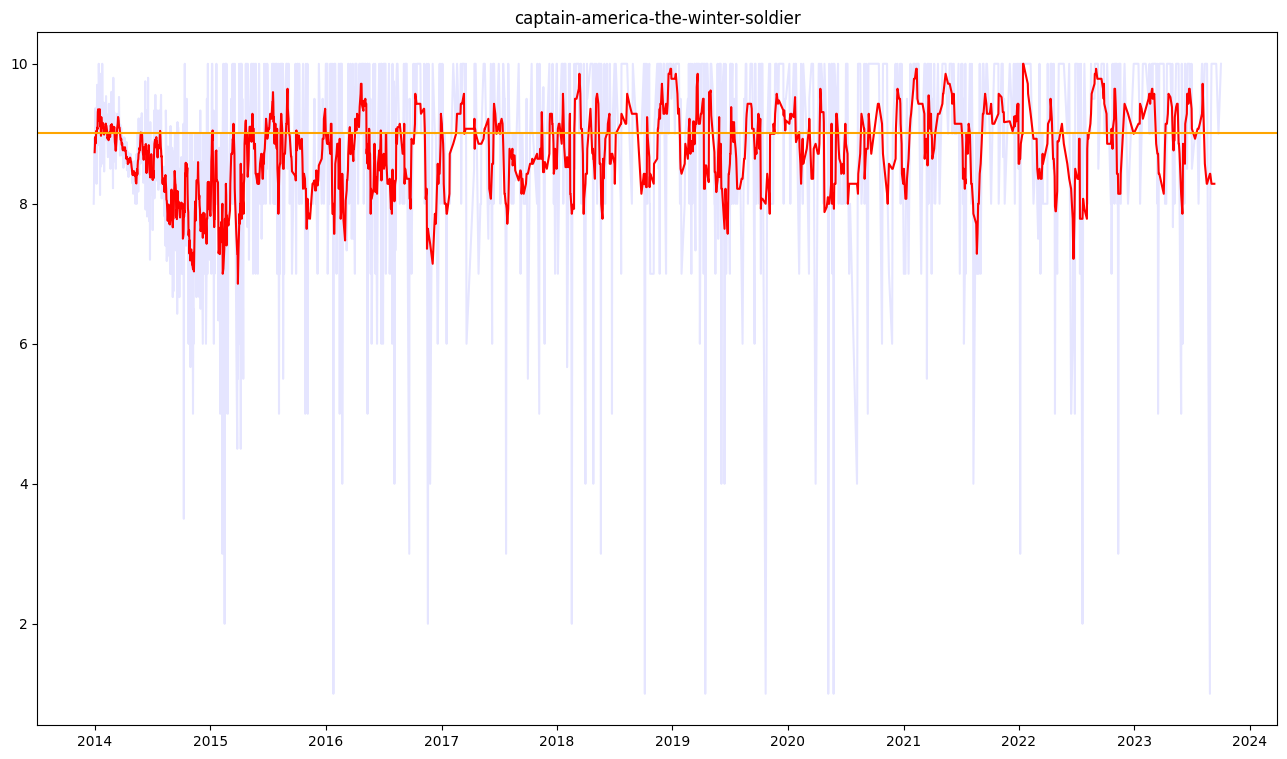

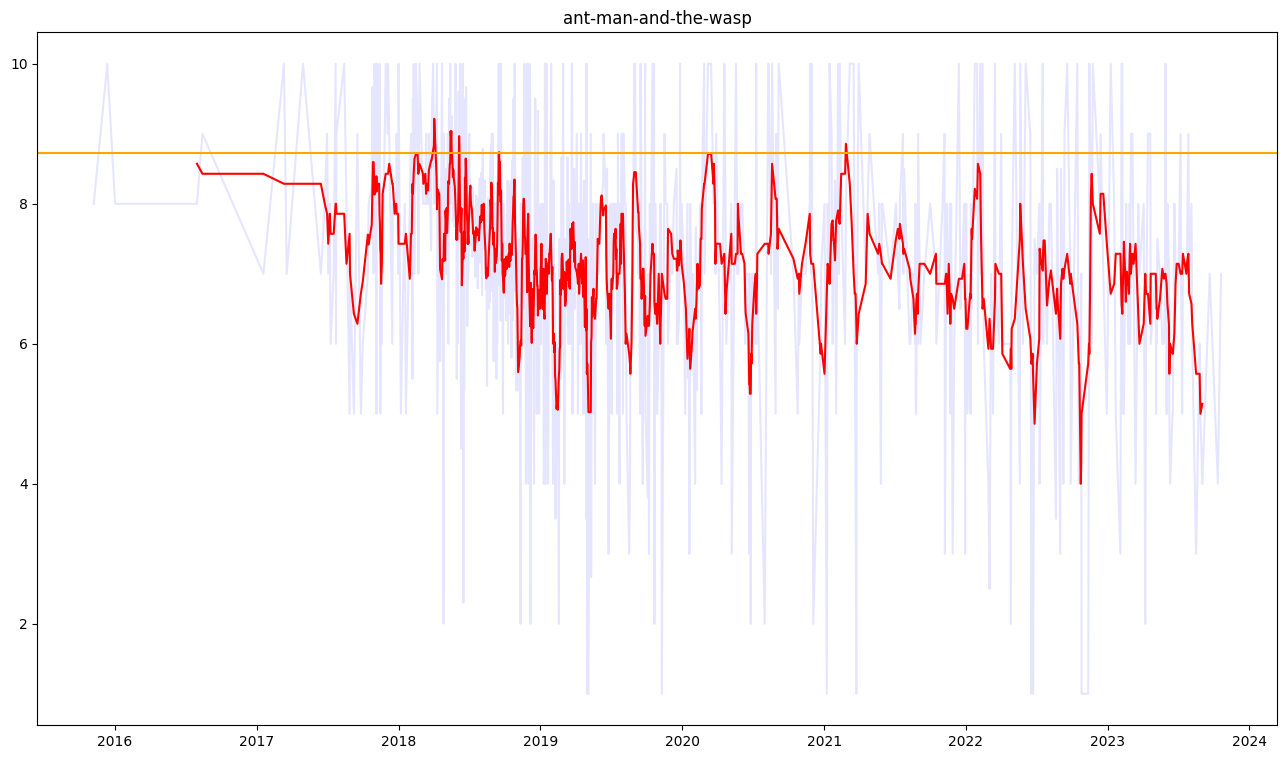

In [40]:
for idx, name in enumerate(movie_names):
    movie_df = user_review_df[user_review_df["movie"] == name]
    critic_df = critic_review_df[critic_review_df["movie"] == name]
    movie_df = movie_df.groupby("date")["score"].mean()
    if movie_df.empty:
        continue
    average_score =  (len(critic_df[critic_df["is_rotten"] == False])/len(critic_df)) * 10
    rolling_df = movie_df.rolling(7, center=True).mean()
    fig = plt.figure(figsize=(16,9))
    plt.plot(movie_df, color="blue", alpha=0.1)
    plt.plot(rolling_df, color="red")
    
    plt.axhline(y=average_score, color='orange', linestyle='-')
    plt.title(f"{name}")
    plt.show()